# 심야 외 시간

## 점수 부여

### 구 별 노인비율 점수 부여

In [3]:
#구 별 노인인구 정보 갖고오기
cursor.execute('select * from gu_population')

#실행 결과 변수에 담기
population = cursor.fetchall()

#출력 확인
for row in population:
    print(row)

(0, 550282, 86606)
(1, 463318, 82984)
(2, 292977, 68617)
(3, 568826, 102096)
(4, 497883, 85418)
(5, 351180, 56819)
(6, 415651, 79984)
(7, 241105, 45342)
(8, 502925, 96422)
(9, 309494, 70436)
(10, 359873, 67030)
(11, 389714, 70474)
(12, 375162, 57895)
(13, 320629, 58113)
(14, 412078, 65661)
(15, 284766, 49462)
(16, 438168, 80414)
(17, 660025, 108894)
(18, 439252, 76317)
(19, 397800, 67509)
(20, 227106, 39747)
(21, 470869, 93817)
(22, 150453, 28764)
(23, 131793, 25920)
(24, 387470, 78955)


In [4]:
import sqlite3

#gu_population 테이블의 컬럼 값들 갖고오기
column_names = [desc[0] for desc in cursor.description]
#데이터프레임 제작
df_population = pd.DataFrame(population, columns=column_names)

df_population.head()

,gu_id,population,aged_population
0,0,550282,86606
1,1,463318,82984
2,2,292977,68617
3,3,568826,102096
4,4,497883,85418


In [5]:
#ratio 컬럼 제작
df_population['ratio(%)']=((df_population['aged_population']/df_population['population'])*100)

df_population.head()

,gu_id,population,aged_population,ratio(%)
0,0,550282,86606,15.738476
1,1,463318,82984,17.910809
2,2,292977,68617,23.420610
3,3,568826,102096,17.948547
4,4,497883,85418,17.156240


In [6]:
df_population=df_population.sort_values(by='ratio(%)', ascending=False)
df_population.head()

,gu_id,population,aged_population,ratio(%)
2,2,292977,68617,23.420610
9,9,309494,70436,22.758438
24,24,387470,78955,20.377061
21,21,470869,93817,19.924225
23,23,131793,25920,19.667205


In [7]:
# 점수는 높은 ratio일수록 높게 (내림차순)
ranked = df_population['ratio(%)'].rank(method='min', ascending=False)

# 최고 점수는 25점, 순위에 따라 점수 부여
df_population['score'] = 26 - ranked.astype(int)

df_population.head()

,gu_id,population,aged_population,ratio(%),score
2,2,292977,68617,23.420610,25
9,9,309494,70436,22.758438,24
24,24,387470,78955,20.377061,23
21,21,470869,93817,19.924225,22
23,23,131793,25920,19.667205,21


In [8]:
df_population.sort_values(by='gu_id', ascending=True, inplace=True)
df_population.reset_index(drop=True, inplace=True)
df_population

,gu_id,population,aged_population,ratio(%),score
0,0,550282,86606,15.738476,2
1,1,463318,82984,17.910809,11
2,2,292977,68617,23.420610,25
3,3,568826,102096,17.948547,12
4,4,497883,85418,17.156240,7
5,5,351180,56819,16.179452,4
6,6,415651,79984,19.243067,20
7,7,241105,45342,18.805914,17
8,8,502925,96422,19.172242,19
9,9,309494,70436,22.758438,24


In [9]:
gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', 
           '광진구', '구로구', '금천구', '노원구', '도봉구', 
           '동대문구', '동작구', '마포구', '서대문구', '서초구', 
           '성동구', '성북구', '송파구', '양천구', '영등포구', 
           '용산구', '은평구', '종로구', '중구', '중랑구']

In [10]:
df_population

,gu_id,population,aged_population,ratio(%),score
0,0,550282,86606,15.738476,2
1,1,463318,82984,17.910809,11
2,2,292977,68617,23.420610,25
3,3,568826,102096,17.948547,12
4,4,497883,85418,17.156240,7
5,5,351180,56819,16.179452,4
6,6,415651,79984,19.243067,20
7,7,241105,45342,18.805914,17
8,8,502925,96422,19.172242,19
9,9,309494,70436,22.758438,24


In [11]:
conn.close()

### 구 별 자차등록률 점수 부여

In [12]:
import mysql.connector
import pandas as pd

In [13]:
conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

cursor = conn.cursor(buffered=True)

In [14]:
#구 당 등록인구 데이터 프레임 만들어놓기
gu_population = df_population[['population']].copy()
gu_population.head()

,population
0,550282
1,463318
2,292977
3,568826
4,497883


In [ ]:
#구 별 등록인구 정보 갖고오기
cursor.execute('select * from gu_car_count')

#실행 결과 변수에 담기
gu_car = cursor.fetchall()

#출력 확인
for row in gu_car:
    print(row)

(0, 254051)
(1, 166203)
(2, 73634)
(3, 202214)
(4, 116612)
(5, 95829)
(6, 145248)
(7, 90653)
(8, 92329)
(9, 152978)
(10, 103025)
(11, 105984)
(12, 121233)
(13, 91209)
(14, 176598)
(15, 104009)
(16, 121292)
(17, 242304)
(18, 150252)
(19, 143579)
(20, 73135)
(21, 134098)
(22, 50202)
(23, 51576)
(24, 115877)


In [ ]:
import sqlite3

#gu_car_count 테이블의 컬럼 값들 갖고오기
column_names = [desc[0] for desc in cursor.description]
#데이터프레임 제작
df_gu_car = pd.DataFrame(gu_car, columns=column_names)

df_gu_car.head()

,gu_id,car_count
0,0,254051
1,1,166203
2,2,73634
3,3,202214
4,4,116612


In [17]:
#위에 만들어둔 gu_population 데이터프레임의 population 컬럼을 df_gu_car 컬럼 사이에 집어넣기
df_gu_car.insert(loc=1, column='population', value=gu_population['population'].values)
df_gu_car.head()

,gu_id,population,car_count
0,0,550282,254051
1,1,463318,166203
2,2,292977,73634
3,3,568826,202214
4,4,497883,116612


In [18]:
#ratio(%) 컬럼 추가
df_gu_car['ratio(%)']=((df_gu_car['car_count']/df_gu_car['population'])*100)

df_gu_car.head()

,gu_id,population,car_count,ratio(%)
0,0,550282,254051,46.167420
1,1,463318,166203,35.872338
2,2,292977,73634,25.133031
3,3,568826,202214,35.549360
4,4,497883,116612,23.421567


In [19]:
df_gu_car=df_gu_car.sort_values(by='ratio(%)', ascending=False)
df_gu_car.head()

,gu_id,population,car_count,ratio(%)
9,9,309494,152978,49.428422
0,0,550282,254051,46.167420
14,14,412078,176598,42.855479
23,23,131793,51576,39.134097
7,7,241105,90653,37.598971


In [20]:
# 점수는 높은 ratio일수록 낮게 (올림차순)
ranked = df_gu_car['ratio(%)'].rank(method='min', ascending=True)

# 최고 점수는 25점, 순위에 따라 점수 부여
df_gu_car['score'] = 26 - ranked.astype(int)

df_gu_car.head()

,gu_id,population,car_count,ratio(%),score
9,9,309494,152978,49.428422,1
0,0,550282,254051,46.167420,2
14,14,412078,176598,42.855479,3
23,23,131793,51576,39.134097,4
7,7,241105,90653,37.598971,5


In [21]:
df_gu_car.sort_values(by='gu_id', ascending=True, inplace=True)
df_gu_car.reset_index(drop=True, inplace=True)
df_gu_car

,gu_id,population,car_count,ratio(%),score
0,0,550282,254051,46.167420,2
1,1,463318,166203,35.872338,9
2,2,292977,73634,25.133031,23
3,3,568826,202214,35.549360,10
4,4,497883,116612,23.421567,24
5,5,351180,95829,27.287716,21
6,6,415651,145248,34.944701,11
7,7,241105,90653,37.598971,5
8,8,502925,92329,18.358403,25
9,9,309494,152978,49.428422,1


In [22]:
conn.close()

### 구 별 심한 장애등록률 점수 부여

In [92]:
import mysql.connector
import pandas as pd

In [93]:
conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

cursor = conn.cursor(buffered=True)

In [94]:
#구 당 등록인구 데이터 프레임 만들어놓기
gu_population = df_population[['population']].copy()
gu_population.head()

,population
0,550282
1,463318
2,292977
3,568826
4,497883


In [95]:
#구 별 등록인구 정보 갖고오기
cursor.execute('select * from gu_disabled_population')

#실행 결과 변수에 담기
gu_disabled = cursor.fetchall()

#출력 확인
for row in gu_disabled:
    print(row)

(0, 5121)
(1, 5545)
(2, 4815)
(3, 8642)
(4, 5555)
(5, 3239)
(6, 5133)
(7, 3139)
(8, 8384)
(9, 4293)
(10, 3899)
(11, 3942)
(12, 3639)
(13, 3332)
(14, 3151)
(15, 2864)
(16, 4591)
(17, 6082)
(18, 4691)
(19, 3752)
(20, 1944)
(21, 6616)
(22, 1610)
(23, 1426)
(24, 5628)


In [96]:
import sqlite3

#gu_disabled_population 테이블의 컬럼 값들 갖고오기
column_names = [desc[0] for desc in cursor.description]

#데이터프레임 제작
df_gu_disabled = pd.DataFrame(gu_disabled, columns=column_names)

df_gu_disabled.head()

,gu_id,disabled_population
0,0,5121
1,1,5545
2,2,4815
3,3,8642
4,4,5555


In [97]:
#위에 만들어둔 gu_population 데이터프레임의 population 컬럼을 df_gu_disabled 컬럼사이에 집어넣기
df_gu_disabled.insert(loc=1, column='population', value=gu_population['population'].values)
df_gu_disabled.head()

,gu_id,population,disabled_population
0,0,550282,5121
1,1,463318,5545
2,2,292977,4815
3,3,568826,8642
4,4,497883,5555


In [98]:
#ratio(%) 컬럼 추가
df_gu_disabled['ratio(%)']=((df_gu_disabled['disabled_population']/df_gu_disabled['population'])*100)

df_gu_disabled.head()

,gu_id,population,disabled_population,ratio(%)
0,0,550282,5121,0.930614
1,1,463318,5545,1.196802
2,2,292977,4815,1.643474
3,3,568826,8642,1.519270
4,4,497883,5555,1.115724


In [99]:
df_gu_disabled=df_gu_disabled.sort_values(by='ratio(%)', ascending=False)
df_gu_disabled.head()

,gu_id,population,disabled_population,ratio(%)
8,8,502925,8384,1.667048
2,2,292977,4815,1.643474
3,3,568826,8642,1.519270
24,24,387470,5628,1.452500
21,21,470869,6616,1.405062


In [100]:
# 점수는 높은 ratio일수록 높게 (내림차순)
ranked = df_gu_disabled['ratio(%)'].rank(method='min', ascending=False)

# 최고 점수는 25점, 순위에 따라 점수 부여
df_gu_disabled['score'] = 26 - ranked.astype(int)

df_gu_disabled.head()

,gu_id,population,disabled_population,ratio(%),score
8,8,502925,8384,1.667048,25
2,2,292977,4815,1.643474,24
3,3,568826,8642,1.519270,23
24,24,387470,5628,1.452500,22
21,21,470869,6616,1.405062,21


In [101]:
df_gu_disabled.sort_values(by='gu_id', ascending=True, inplace=True)
df_gu_disabled.reset_index(drop=True, inplace=True)
df_gu_disabled

,gu_id,population,disabled_population,ratio(%),score
0,0,550282,5121,0.930614,5
1,1,463318,5545,1.196802,17
2,2,292977,4815,1.643474,24
3,3,568826,8642,1.519270,23
4,4,497883,5555,1.115724,16
5,5,351180,3239,0.922319,4
6,6,415651,5133,1.234930,18
7,7,241105,3139,1.301922,19
8,8,502925,8384,1.667048,25
9,9,309494,4293,1.387103,20


In [102]:
conn.close()

### 구 별 버스정류장 비율 점수 부여

In [103]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

cursor = conn.cursor(buffered=True)

In [104]:
#구 당 등록인구 데이터 프레임 만들어놓기
gu_population = df_population[['population']].copy()
gu_population.head()

,population
0,550282
1,463318
2,292977
3,568826
4,497883


In [105]:
#구 별 버스정류소 수 정보 갖고오기
cursor.execute('select * from bus_population')

#실행 결과 변수에 담기
gu_bus_station = cursor.fetchall()

#출력 확인
for row in gu_bus_station:
    print(row)

(0, 415, 10, 3941, 1032, 647, 573, 1608, 6280, 11669, 29611, 44219, 34894, 23413, 21004, 23352, 25803, 26111, 30619, 34694, 39686, 45434, 33018, 24064, 23818, 24062, 10994)
(1, 263, 3, 1694, 432, 213, 167, 852, 2507, 5733, 13725, 14312, 9768, 7892, 7748, 8353, 8940, 8916, 10672, 13003, 13183, 14721, 11975, 8940, 8470, 7934, 4153)
(2, 195, 6, 2458, 724, 285, 281, 2695, 4494, 6736, 14658, 19011, 13799, 12165, 12307, 13164, 13639, 14043, 16026, 17710, 18194, 19599, 16046, 12044, 10451, 9322, 5447)
(3, 311, 6, 2311, 549, 393, 301, 1960, 4007, 7582, 18281, 24035, 16133, 12755, 12547, 13702, 14370, 14427, 16884, 19351, 20159, 23852, 18635, 14143, 13165, 12056, 6178)
(4, 255, 8, 3261, 745, 568, 508, 2335, 6950, 10862, 24896, 31862, 24370, 19125, 17393, 19196, 20060, 19219, 22092, 25785, 27890, 32291, 27064, 20948, 19477, 18072, 10883)
(5, 168, 7, 1860, 611, 464, 365, 1034, 2776, 4477, 9559, 13362, 9362, 7566, 7326, 7989, 8751, 8996, 10132, 11685, 12521, 14733, 11903, 9179, 8614, 7877, 4518)
(

In [106]:
import sqlite3

#bus_population 테이블의 컬럼 값들 갖고오기
column_names = [desc[0] for desc in cursor.description]

#데이터프레임 제작
df_gu_bus_station = pd.DataFrame(gu_bus_station, columns=column_names)

df_gu_bus_station.head()

,gu_id,station_count,night_bus,user_0,user_1,user_2,user_3,user_4,user_5,user_6,...,user_14,user_15,user_16,user_17,user_18,user_19,user_20,user_21,user_22,user_23
0,0,415,10,3941,1032,647,573,1608,6280,11669,...,26111,30619,34694,39686,45434,33018,24064,23818,24062,10994
1,1,263,3,1694,432,213,167,852,2507,5733,...,8916,10672,13003,13183,14721,11975,8940,8470,7934,4153
2,2,195,6,2458,724,285,281,2695,4494,6736,...,14043,16026,17710,18194,19599,16046,12044,10451,9322,5447
3,3,311,6,2311,549,393,301,1960,4007,7582,...,14427,16884,19351,20159,23852,18635,14143,13165,12056,6178
4,4,255,8,3261,745,568,508,2335,6950,10862,...,19219,22092,25785,27890,32291,27064,20948,19477,18072,10883


In [107]:
df_gu_bus_station = df_gu_bus_station.iloc[:,0:2].copy()
df_gu_bus_station.head()

,gu_id,station_count
0,0,415
1,1,263
2,2,195
3,3,311
4,4,255


In [108]:
#위에 만들어둔 gu_population 데이터프레임의 population 컬럼을 df_gu_bus_station 컬럼 사이에 집어넣기
df_gu_bus_station.insert(loc=1, column='population', value=gu_population['population'].values)
df_gu_bus_station.head()

,gu_id,population,station_count
0,0,550282,415
1,1,463318,263
2,2,292977,195
3,3,568826,311
4,4,497883,255


In [109]:
#ratio(%) 컬럼 추가
df_gu_bus_station['ratio(%)']=((df_gu_bus_station['station_count']/df_gu_bus_station['population'])*100)

df_gu_bus_station.head()

,gu_id,population,station_count,ratio(%)
0,0,550282,415,0.075416
1,1,463318,263,0.056764
2,2,292977,195,0.066558
3,3,568826,311,0.054674
4,4,497883,255,0.051217


In [110]:
df_gu_bus_station.sort_values(by='ratio(%)',ascending=False, inplace=True)
df_gu_bus_station.head()

,gu_id,population,station_count,ratio(%)
22,22,150453,187,0.124291
23,23,131793,155,0.117609
20,20,227106,231,0.101715
24,24,387470,357,0.092136
8,8,502925,381,0.075757


In [111]:
# 점수는 높은 ratio일수록 낮게 (내림차순)
ranked = df_gu_bus_station['ratio(%)'].rank(method='min', ascending=True)

# 최고 점수는 25점, 순위에 따라 점수 부여
df_gu_bus_station['score'] = 26 - ranked.astype(int)

df_gu_bus_station.head()

,gu_id,population,station_count,ratio(%),score
22,22,150453,187,0.124291,1
23,23,131793,155,0.117609,2
20,20,227106,231,0.101715,3
24,24,387470,357,0.092136,4
8,8,502925,381,0.075757,5


In [112]:
df_gu_bus_station.sort_values(by='gu_id', ascending=True, inplace=True)
df_gu_bus_station.reset_index(drop=True, inplace=True)
df_gu_bus_station

,gu_id,population,station_count,ratio(%),score
0,0,550282,415,0.075416,6
1,1,463318,263,0.056764,21
2,2,292977,195,0.066558,13
3,3,568826,311,0.054674,22
4,4,497883,255,0.051217,23
5,5,351180,168,0.047839,24
6,6,415651,245,0.058944,19
7,7,241105,161,0.066776,12
8,8,502925,381,0.075757,5
9,9,309494,229,0.073992,7


In [113]:
conn.close()

### 구 별 지하철역 비율 점수

In [114]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

cursor = conn.cursor(buffered=True)

In [115]:
#구 당 등록인구 데이터 프레임 만들어놓기
gu_population = df_population[['population']].copy()
gu_population.head()

,population
0,550282
1,463318
2,292977
3,568826
4,497883


In [116]:
#구 별 지하철역 수 정보 갖고오기
cursor.execute('select * from gu_subway_count')

#실행 결과 변수에 담기
gu_subway_station = cursor.fetchall()

#출력 확인
for row in gu_subway_station:
    print(row)

(0, 31, '2, 3, 7, 9, 수인분당', 5)
(1, 15, '5, 8, 9', 3)
(2, 3, '4', 1)
(3, 9, '5', 1)
(4, 4, '2', 1)
(5, 11, '2, 5, 7', 3)
(6, 7, '2, 7', 2)
(7, 1, '7', 1)
(8, 14, '4, 6, 7, 경춘', 4)
(9, 3, '4, 7', 2)
(10, 11, '1, 2, 5, 경의중앙, 수인분당, 경춘', 6)
(11, 12, '2, 4, 7', 3)
(12, 19, '2, 5, 6, 경의중앙', 4)
(13, 7, '2, 3, 5, 경의중앙', 4)
(14, 12, '2, 3, 4, 7', 4)
(15, 19, '2, 3, 5, 경의중앙, 수인분당', 5)
(16, 9, '4, 6', 2)
(17, 29, '2, 3, 5, 8, 9, 수인분당', 6)
(18, 5, '2, 5', 2)
(19, 11, '2, 5, 7', 3)
(20, 15, '4, 6, 경의중앙', 3)
(21, 15, '3, 6, 경의중앙', 3)
(22, 15, '1, 3, 4, 5, 6', 5)
(23, 24, '1, 2, 3, 4, 5, 6, 경의중앙', 7)
(24, 16, '6, 7, 경의중앙, 경춘', 4)


In [117]:
import sqlite3

#subway_population 테이블의 컬럼 값들 갖고오기
column_names = [desc[0] for desc in cursor.description]

#데이터프레임 제작
df_gu_subway_station = pd.DataFrame(gu_subway_station, columns=column_names)

df_gu_subway_station.head()

,gu_id,station_count,line_info,line_count
0,0,31,"2, 3, 7, 9, 수인분당",5
1,1,15,"5, 8, 9",3
2,2,3,4,1
3,3,9,5,1
4,4,4,2,1


### 구 별 등록인구 대비 역 수 비율 점수부여

In [118]:
df_sstation_count = df_gu_subway_station.iloc[:,0:2].copy()
df_sstation_count.head()

,gu_id,station_count
0,0,31
1,1,15
2,2,3
3,3,9
4,4,4


In [119]:
#위에 만들어둔 gu_population 데이터프레임의 population 컬럼을 df_sstation_count 컬럼 사이에 집어넣기
df_sstation_count.insert(loc=1, column='population', value=gu_population['population'].values)
df_sstation_count.head()

,gu_id,population,station_count
0,0,550282,31
1,1,463318,15
2,2,292977,3
3,3,568826,9
4,4,497883,4


In [120]:
#ratio(%) 컬럼 추가
df_sstation_count['ratio(%)']=((df_sstation_count['station_count']/df_sstation_count['population'])*100)
df_sstation_count.head()

,gu_id,population,station_count,ratio(%)
0,0,550282,31,0.005633
1,1,463318,15,0.003238
2,2,292977,3,0.001024
3,3,568826,9,0.001582
4,4,497883,4,0.000803


In [121]:
df_sstation_count.sort_values(by='ratio(%)',ascending=False, inplace=True)
df_sstation_count.head()

,gu_id,population,station_count,ratio(%)
23,23,131793,24,0.018210
22,22,150453,15,0.009970
15,15,284766,19,0.006672
20,20,227106,15,0.006605
0,0,550282,31,0.005633


In [122]:
# 점수는 높은 ratio일수록 낮게 (내림차순)
ranked = df_sstation_count['ratio(%)'].rank(method='min', ascending=True)

# 최고 점수는 25점, 순위에 따라 점수 부여
df_sstation_count['score'] = 26 - ranked.astype(int)

df_sstation_count.head()

,gu_id,population,station_count,ratio(%),score
23,23,131793,24,0.018210,1
22,22,150453,15,0.009970,2
15,15,284766,19,0.006672,3
20,20,227106,15,0.006605,4
0,0,550282,31,0.005633,5


In [123]:
df_sstation_count.sort_values(by='gu_id',ascending=True, inplace=True)
df_sstation_count.reset_index(drop=True, inplace=True)
df_sstation_count.head()

,gu_id,population,station_count,ratio(%),score
0,0,550282,31,0.005633,5
1,1,463318,15,0.003238,9
2,2,292977,3,0.001024,22
3,3,568826,9,0.001582,20
4,4,497883,4,0.000803,24


### 구 별 역 대비 호선 수 비율 점수부여

In [55]:
df_sline_count = df_gu_subway_station.drop(columns=['line_info'])
df_sline_count.head()

,gu_id,station_count,line_count
0,0,31,5
1,1,15,3
2,2,3,1
3,3,9,1
4,4,4,1


In [56]:
#ratio(%) 컬럼 추가
df_sline_count['ratio(%)']=((df_sline_count['line_count']/df_sline_count['station_count'])*100).round(4)
df_sline_count.head()

,gu_id,station_count,line_count,ratio(%)
0,0,31,5,16.1290
1,1,15,3,20.0000
2,2,3,1,33.3333
3,3,9,1,11.1111
4,4,4,1,25.0000


In [57]:
df_sline_count.sort_values(by='ratio(%)',ascending=False, inplace=True)
df_sline_count.head()

,gu_id,station_count,line_count,ratio(%)
7,7,1,1,100.0000
9,9,3,2,66.6667
13,13,7,4,57.1429
10,10,11,6,54.5455
18,18,5,2,40.0000


In [58]:
# 점수는 높은 ratio일수록 낮게 (내림차순)
ranked = df_sline_count['ratio(%)'].rank(method='min', ascending=True)

# 최고 점수는 25점, 순위에 따라 점수 부여
df_sline_count['score'] = 26 - ranked.astype(int)

df_sline_count.head()

,gu_id,station_count,line_count,ratio(%),score
7,7,1,1,100.0000,1
9,9,3,2,66.6667,2
13,13,7,4,57.1429,3
10,10,11,6,54.5455,4
18,18,5,2,40.0000,5


In [59]:
df_sline_count.sort_values(by='gu_id',ascending=True, inplace=True)
df_sline_count.reset_index(drop=True, inplace=True)
df_sline_count.head()

,gu_id,station_count,line_count,ratio(%),score
0,0,31,5,16.1290,24
1,1,15,3,20.0000,23
2,2,3,1,33.3333,8
3,3,9,1,11.1111,25
4,4,4,1,25.0000,17


In [124]:
conn.close()

### 구 별 등록노인인구 대비 응급실 수 비율 점수부여

In [125]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

cursor = conn.cursor(buffered=True)

In [126]:
#구 당 등록인구 데이터 프레임 만들어놓기
gu_population = df_population[['population']].copy()
gu_population.head()

,population
0,550282
1,463318
2,292977
3,568826
4,497883


In [127]:
#구 별 응급실 수 정보 갖고오기
cursor.execute('select * from gu_emergency_room')

#실행 결과 변수에 담기
gu_emergency = cursor.fetchall()

#출력 확인
for row in gu_emergency:
    print(row)

(0, 6)
(1, 3)
(2, 3)
(3, 5)
(4, 4)
(5, 2)
(6, 2)
(7, 1)
(8, 3)
(9, 1)
(10, 4)
(11, 2)
(12, 1)
(13, 2)
(14, 1)
(15, 2)
(16, 1)
(17, 2)
(18, 3)
(19, 9)
(20, 1)
(21, 4)
(22, 4)
(23, 2)
(24, 3)


In [128]:
import sqlite3
#bus_population 테이블의 컬럼 값들 갖고오기
column_names = [desc[0] for desc in cursor.description]

#데이터프레임 제작
df_gu_emergency = pd.DataFrame(gu_emergency, columns=column_names)

df_gu_emergency.head()

,gu_id,room_count
0,0,6
1,1,3
2,2,3
3,3,5
4,4,4


In [129]:
#위에 만들어둔 gu_population 데이터프레임의 population 컬럼을 df_gu_emergency 컬럼 사이에 집어넣기
df_gu_emergency.insert(loc=1, column='population', value=gu_population['population'].values)
df_gu_emergency.head()

,gu_id,population,room_count
0,0,550282,6
1,1,463318,3
2,2,292977,3
3,3,568826,5
4,4,497883,4


In [130]:
#ratio(%) 컬럼 추가
df_gu_emergency['ratio(%)']=((df_gu_emergency['room_count']/df_gu_emergency['population'])*100)

#ratio로 sort
df_gu_emergency.sort_values(by='ratio(%)',ascending=False, inplace=True)
df_gu_emergency.head()

,gu_id,population,room_count,ratio(%)
22,22,150453,4,0.002659
19,19,397800,9,0.002262
23,23,131793,2,0.001518
10,10,359873,4,0.001112
0,0,550282,6,0.001090


In [131]:
# 점수는 높은 ratio일수록 낮게 (내림차순)
ranked = df_gu_emergency['ratio(%)'].rank(method='min', ascending=True)

# 최고 점수는 25점, 순위에 따라 점수 부여
df_gu_emergency['score'] = 26 - ranked.astype(int)

df_gu_emergency

,gu_id,population,room_count,ratio(%),score
22,22,150453,4,0.002659,1
19,19,397800,9,0.002262,2
23,23,131793,2,0.001518,3
10,10,359873,4,0.001112,4
0,0,550282,6,0.001090,5
2,2,292977,3,0.001024,6
3,3,568826,5,0.000879,7
21,21,470869,4,0.000849,8
4,4,497883,4,0.000803,9
24,24,387470,3,0.000774,10


In [132]:
df_gu_emergency.sort_values(by='gu_id', ascending=True, inplace=True)
df_gu_emergency.reset_index(drop=True, inplace=True)
df_gu_emergency.head()

,gu_id,population,room_count,ratio(%),score
0,0,550282,6,0.001090,5
1,1,463318,3,0.000648,13
2,2,292977,3,0.001024,6
3,3,568826,5,0.000879,7
4,4,497883,4,0.000803,9


In [133]:
conn.close()

----------------

------------

In [134]:
dfs_dict = {
    'df_aged_population': df_population,
    'df_gu_disabled': df_gu_disabled,
    'df_gu_car': df_gu_car,
    'df_gu_bus_station': df_gu_bus_station,
    'df_sstation_count': df_sstation_count
  #  'df_gu_emergency': df_gu_emergency
}

# gu_id와 score 추출 후 컬럼 이름을 해당 df 이름으로 변경
renamed_dfs = [
    df[['gu_id', 'score']].rename(columns={'score': name})
    for name, df in dfs_dict.items()
]

# gu_id 기준으로 병합
from functools import reduce
merged_df = reduce(lambda left, right: pd.merge(left, right, on='gu_id', how='outer'), renamed_dfs)

# score 합계인 total 컬럼 추가
score_columns = list(dfs_dict.keys())
merged_df['total'] = merged_df[score_columns].sum(axis=1)

merged_df

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,total
0,0,2,5,2,6,5,20
1,1,11,17,9,21,9,67
2,2,25,24,23,13,22,107
3,3,12,23,10,22,20,87
4,4,7,16,24,23,24,94
5,5,4,4,21,24,11,64
6,6,20,18,11,19,19,87
7,7,17,19,5,12,25,78
8,8,19,25,25,5,15,89
9,9,24,20,1,7,23,75


In [135]:
gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', 
           '광진구', '구로구', '금천구', '노원구', '도봉구', 
           '동대문구', '동작구', '마포구', '서대문구', '서초구', 
           '성동구', '성북구', '송파구', '양천구', '영등포구', 
           '용산구', '은평구', '종로구', '중구', '중랑구']

df_result = merged_df.copy()
gu_dict = dict(enumerate(gu_list))
df_result['gu_id'] = df_result['gu_id'].map(gu_dict)
df_result

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,total
0,강남구,2,5,2,6,5,20
1,강동구,11,17,9,21,9,67
2,강북구,25,24,23,13,22,107
3,강서구,12,23,10,22,20,87
4,관악구,7,16,24,23,24,94
5,광진구,4,4,21,24,11,64
6,구로구,20,18,11,19,19,87
7,금천구,17,19,5,12,25,78
8,노원구,19,25,25,5,15,89
9,도봉구,24,20,1,7,23,75


In [72]:
df_result.sort_values('total',ascending=False).head()

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,total
2,강북구,25,24,23,13,22,107
4,관악구,7,16,24,23,24,94
8,노원구,19,25,25,5,15,89
6,구로구,20,18,11,19,19,87
3,강서구,12,23,10,22,20,87


In [73]:
df_result.sort_values('total',ascending=True).head(10)

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,total
0,강남구,2,5,2,6,5,20
14,서초구,3,1,3,8,14,29
20,용산구,10,2,15,3,4,34
17,송파구,5,3,6,18,7,39
15,성동구,8,8,7,15,3,41
23,중구,21,14,4,2,1,42
12,마포구,1,7,14,14,6,42
19,영등포구,6,6,8,10,16,46
22,종로구,18,13,13,1,2,47
5,광진구,4,4,21,24,11,64


------
비율

In [136]:
dfs_dict = {
    'df_aged_population': df_population,
    'df_gu_disabled': df_gu_disabled,
    'df_gu_car': df_gu_car,
    'df_gu_bus_station': df_gu_bus_station,
    'df_sstation_count': df_sstation_count,
    'df_gu_emergency': df_gu_emergency
}

# gu_id와 ratio(%) 추출 후 컬럼 이름을 해당 df 이름으로 변경
renamed_dfs = [
    df[['gu_id', 'ratio(%)']].rename(columns={'ratio(%)': name})
    for name, df in dfs_dict.items()
]

# gu_id 기준으로 병합
from functools import reduce
ratio_df = reduce(lambda left, right: pd.merge(left, right, on='gu_id', how='outer'), renamed_dfs)

ratio_df

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,df_gu_emergency
0,0,15.738476,0.930614,46.167420,0.075416,0.005633,0.001090
1,1,17.910809,1.196802,35.872338,0.056764,0.003238,0.000648
2,2,23.420610,1.643474,25.133031,0.066558,0.001024,0.001024
3,3,17.948547,1.519270,35.549360,0.054674,0.001582,0.000879
4,4,17.156240,1.115724,23.421567,0.051217,0.000803,0.000803
5,5,16.179452,0.922319,27.287716,0.047839,0.003132,0.000570
6,6,19.243067,1.234930,34.944701,0.058944,0.001684,0.000481
7,7,18.805914,1.301922,37.598971,0.066776,0.000415,0.000415
8,8,19.172242,1.667048,18.358403,0.075757,0.002784,0.000597
9,9,22.758438,1.387103,49.428422,0.073992,0.000969,0.000323


## 점수 재산정


In [137]:

def normalize_score(series, reverse=False):
    max_val = series.max()
    min_val = series.min()
    if reverse:
        return 1 + 9 * (max_val - series) / (max_val - min_val)
    else:
        return 1 + 9 * (series - min_val) / (max_val - min_val)

# 점수 계산
df_scores = pd.DataFrame()
df_scores['gu_id'] = ratio_df['gu_id']
df_scores['df_aged_population'] = normalize_score(ratio_df['df_aged_population'])        # 높을수록 좋음
df_scores['df_gu_disabled'] = normalize_score(ratio_df['df_gu_disabled'])                # 높을수록 좋음
df_scores['df_gu_car'] = normalize_score(ratio_df['df_gu_car'], reverse=True)            # 낮을수록 좋음
df_scores['df_gu_bus_station'] = normalize_score(ratio_df['df_gu_bus_station'], reverse=True)
df_scores['df_sstation_count'] = normalize_score(ratio_df['df_sstation_count'], reverse=True)
df_scores['df_gu_emergency'] = normalize_score(ratio_df['df_gu_emergency'], reverse=True)

df_scores

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,df_gu_emergency
0,0,1.345277,2.655138,1.944609,5.992330,7.360673,6.807481
1,1,3.792636,5.309982,4.926768,7.897459,8.572410,8.447374
2,2,10.000000,9.764883,8.037605,6.897096,9.691895,7.053287
3,3,3.835152,8.526126,5.020325,8.110987,9.409571,7.590113
4,4,2.942535,4.501344,8.533362,8.464115,9.803446,7.870072
5,5,1.842083,2.572410,7.413461,8.809171,8.625625,8.736195
6,6,5.293563,5.690254,5.195475,7.674866,9.358037,9.063308
7,7,4.801066,6.358403,4.426617,6.874853,10.000000,9.309251
8,8,5.213772,10.000000,10.000000,5.957505,8.801917,8.636205
9,9,9.253995,7.207955,1.000000,6.137797,9.719532,9.648634


In [138]:
gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', 
           '광진구', '구로구', '금천구', '노원구', '도봉구', 
           '동대문구', '동작구', '마포구', '서대문구', '서초구', 
           '성동구', '성북구', '송파구', '양천구', '영등포구', 
           '용산구', '은평구', '종로구', '중구', '중랑구']


gu_dict = dict(enumerate(gu_list))
df_scores['gu_id'] = df_scores['gu_id'].map(gu_dict)
df_scores

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,df_gu_emergency
0,강남구,1.345277,2.655138,1.944609,5.992330,7.360673,6.807481
1,강동구,3.792636,5.309982,4.926768,7.897459,8.572410,8.447374
2,강북구,10.000000,9.764883,8.037605,6.897096,9.691895,7.053287
3,강서구,3.835152,8.526126,5.020325,8.110987,9.409571,7.590113
4,관악구,2.942535,4.501344,8.533362,8.464115,9.803446,7.870072
5,광진구,1.842083,2.572410,7.413461,8.809171,8.625625,8.736195
6,구로구,5.293563,5.690254,5.195475,7.674866,9.358037,9.063308
7,금천구,4.801066,6.358403,4.426617,6.874853,10.000000,9.309251
8,노원구,5.213772,10.000000,10.000000,5.957505,8.801917,8.636205
9,도봉구,9.253995,7.207955,1.000000,6.137797,9.719532,9.648634


---

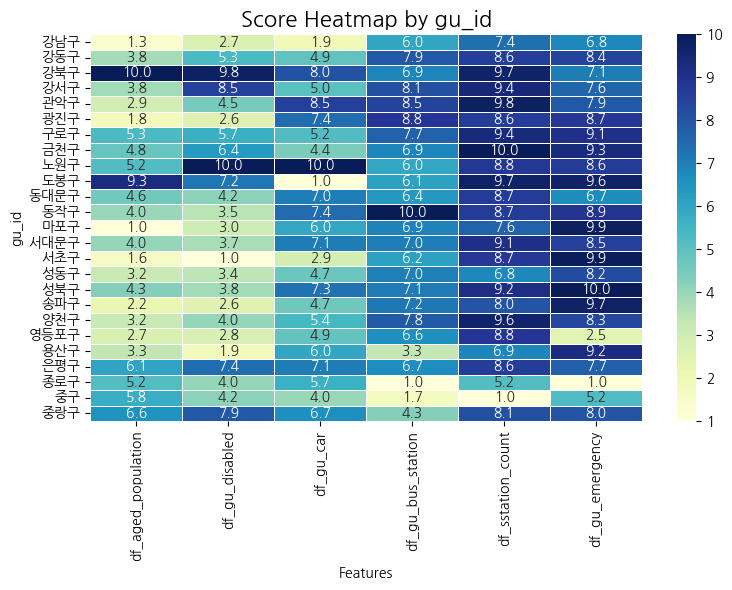

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# gu_id를 인덱스로 설정
score_df_indexed = df_scores.set_index('gu_id')

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(score_df_indexed, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title("Score Heatmap by gu_id", fontsize=16)
plt.ylabel("gu_id")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

---

In [186]:
df_daily_score = df_scores.copy()

# 총합 점수 계산
df_daily_score['total_score'] = df_daily_score.drop(columns='gu_id').sum(axis=1).round(2)
df_daily_score

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,df_gu_emergency,total_score
0,강남구,1.345277,2.655138,1.944609,5.992330,7.360673,6.807481,26.11
1,강동구,3.792636,5.309982,4.926768,7.897459,8.572410,8.447374,38.95
2,강북구,10.000000,9.764883,8.037605,6.897096,9.691895,7.053287,51.44
3,강서구,3.835152,8.526126,5.020325,8.110987,9.409571,7.590113,42.49
4,관악구,2.942535,4.501344,8.533362,8.464115,9.803446,7.870072,42.11
5,광진구,1.842083,2.572410,7.413461,8.809171,8.625625,8.736195,38.00
6,구로구,5.293563,5.690254,5.195475,7.674866,9.358037,9.063308,42.28
7,금천구,4.801066,6.358403,4.426617,6.874853,10.000000,9.309251,41.77
8,노원구,5.213772,10.000000,10.000000,5.957505,8.801917,8.636205,48.61
9,도봉구,9.253995,7.207955,1.000000,6.137797,9.719532,9.648634,42.97


---
db insert


In [148]:
import mysql.connector

gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', 
'광진구', '구로구', '금천구', '노원구', '도봉구', 
'동대문구', '동작구', '마포구', '서대문구', '서초구', 
'성동구', '성북구', '송파구', '양천구', '영등포구', 
'용산구', '은평구', '종로구', '중구', '중랑구']

conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

In [149]:
df_db =df_scores_total.copy()
for i in range(len(gu_list)):
    df_db.iloc[i,0] = i

df_db['gu_id']=df_db['gu_id'].astype(int)

In [150]:
##### 바꿀 테이블로 이름 바꾸기.
sql = "insert into daily_score values (%s,%s,%s,%s,%s,%s,%s,%s)"
cursor = conn.cursor(buffered=True)


In [151]:
import numpy as np

def convert_types(row):
    new_row = []
    for item in row:
        if isinstance(item, (np.int64, np.integer)):
            new_row.append(int(item))
        elif isinstance(item, (np.float64, np.floating)):
            new_row.append(float(item))
        else:
            new_row.append(item)
    return tuple(new_row)

data = [convert_types(row) for row in df_db.values]

cursor.executemany(sql, data)
conn.commit()

In [152]:
conn.close()

## 막대그래프

### 노인 점수 막대그래프

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상위 3개 추출
top3 = df_daily_score.sort_values(by='df_aged_population', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_daily_score[df_daily_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
aged_population = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

aged_population

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,df_gu_emergency,total_score
2,강북구,10.000000,9.764883,8.037605,6.897096,9.691895,7.053287,51.44
9,도봉구,9.253995,7.207955,1.000000,6.137797,9.719532,9.648634,42.97
24,중랑구,6.571126,7.860192,6.655011,4.284454,8.121372,7.978010,41.47
0,강남구,1.345277,2.655138,1.944609,5.992330,7.360673,6.807481,26.11
12,마포구,1.000000,3.047769,5.957262,6.916177,7.648438,9.858067,34.43


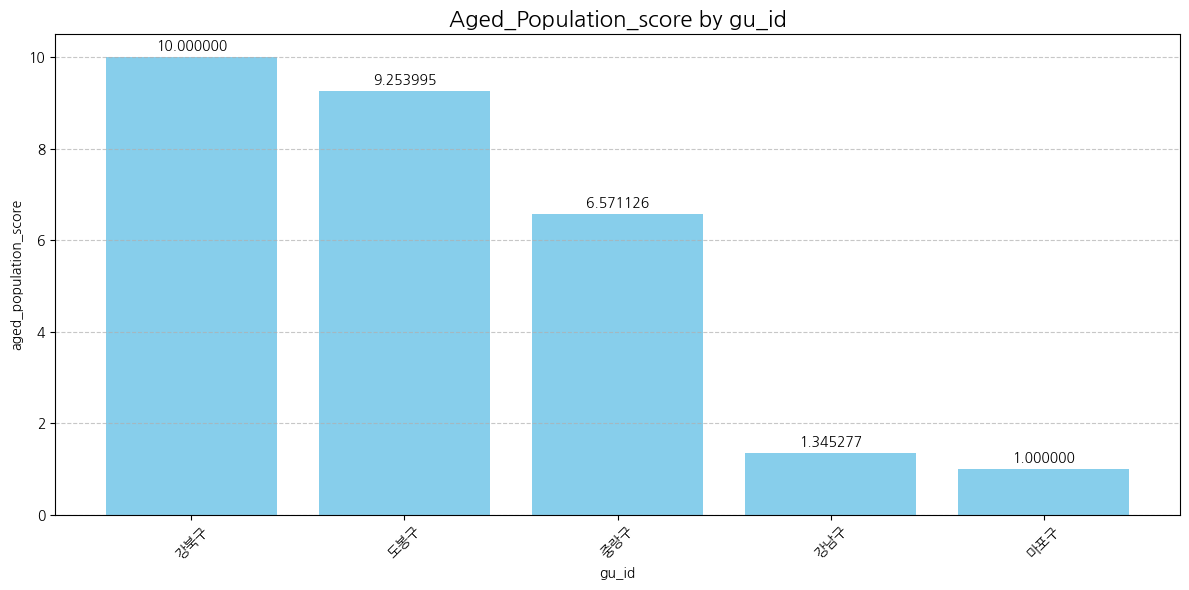

In [190]:
plt.figure(figsize=(12, 6))
aged_population_score = aged_population.sort_values(by='df_aged_population', ascending=False)

bars=plt.bar(aged_population['gu_id'].astype(str), aged_population['df_aged_population'], color='skyblue')
plt.title("Aged_Population_score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("aged_population_score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 장애인 점수 막대그래프

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
# 상위 3개 추출
top3 = df_daily_score.sort_values(by='df_gu_disabled', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_daily_score[df_daily_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
disabled_population = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

disabled_population

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,df_gu_emergency,total_score
8,노원구,5.213772,10.000000,10.000000,5.957505,8.801917,8.636205,48.61
2,강북구,10.000000,9.764883,8.037605,6.897096,9.691895,7.053287,51.44
3,강서구,3.835152,8.526126,5.020325,8.110987,9.409571,7.590113,42.49
0,강남구,1.345277,2.655138,1.944609,5.992330,7.360673,6.807481,26.11
12,마포구,1.000000,3.047769,5.957262,6.916177,7.648438,9.858067,34.43


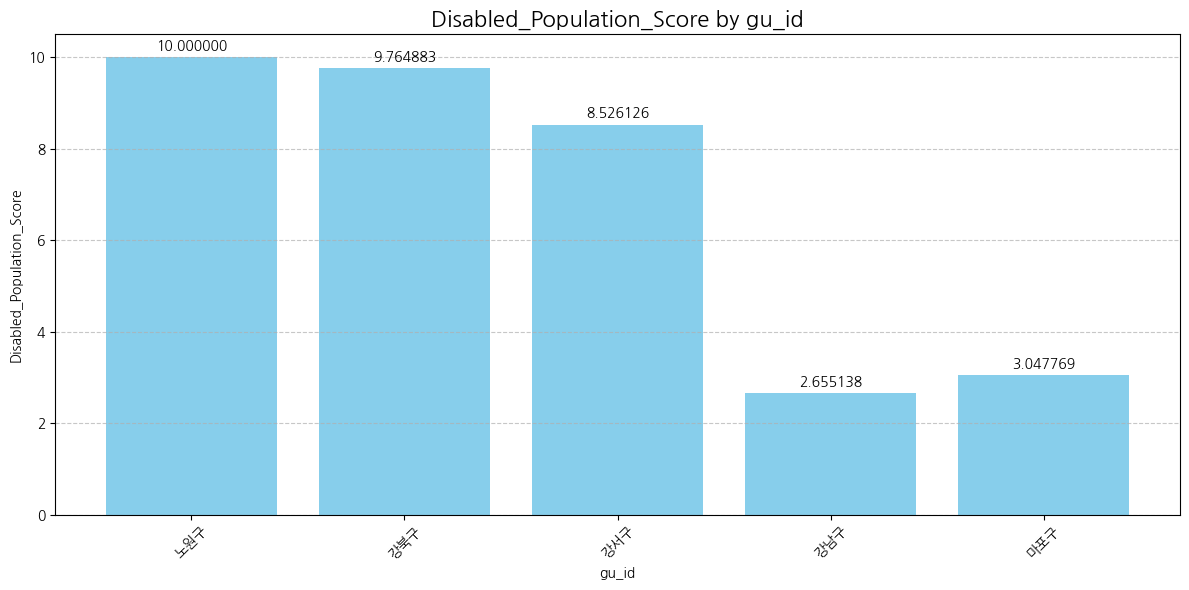

In [192]:
plt.figure(figsize=(12, 6))
disabled_population_score = disabled_population.sort_values(by='df_gu_disabled', ascending=False)

bars=plt.bar(disabled_population['gu_id'].astype(str), disabled_population['df_gu_disabled'], color='skyblue')
plt.title("Disabled_Population_Score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("Disabled_Population_Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 자차등록 점수 막대그래프

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상위 3개 추출
top3 = df_daily_score.sort_values(by='df_gu_car', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_daily_score[df_daily_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
car_score = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

car_score

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,df_gu_emergency,total_score
8,노원구,5.213772,10.000000,10.000000,5.957505,8.801917,8.636205,48.61
4,관악구,2.942535,4.501344,8.533362,8.464115,9.803446,7.870072,42.11
2,강북구,10.000000,9.764883,8.037605,6.897096,9.691895,7.053287,51.44
0,강남구,1.345277,2.655138,1.944609,5.992330,7.360673,6.807481,26.11
12,마포구,1.000000,3.047769,5.957262,6.916177,7.648438,9.858067,34.43


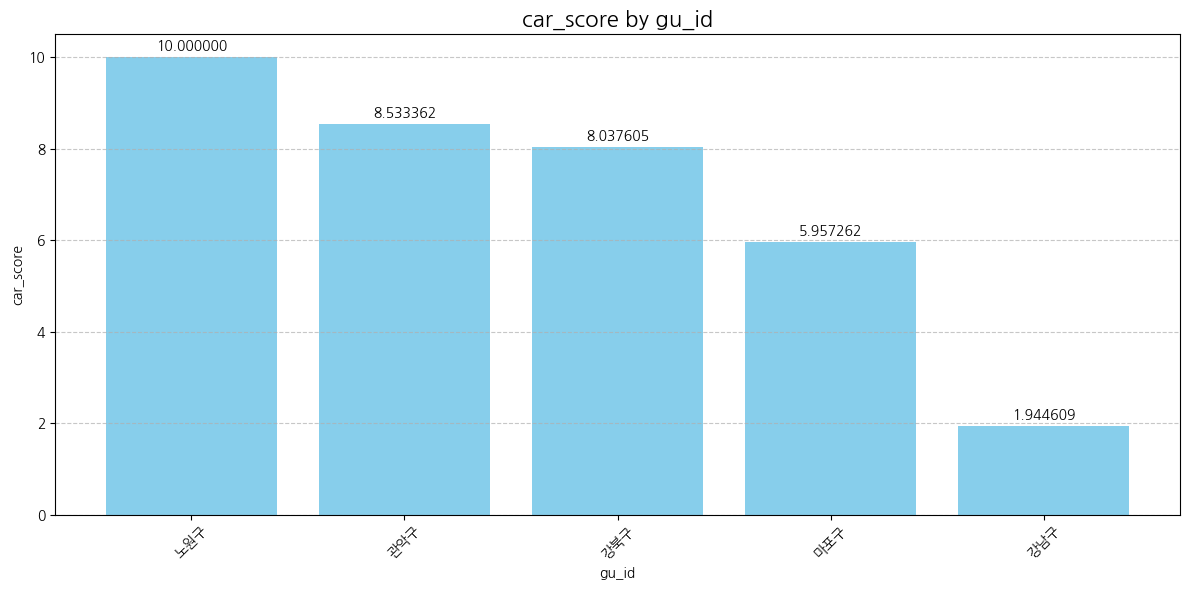

In [194]:
plt.figure(figsize=(12, 6))
car_score = car_score.sort_values(by='df_gu_car', ascending=False)

bars=plt.bar(car_score['gu_id'].astype(str), car_score['df_gu_car'], color='skyblue')
plt.title("car_score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("car_score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 버스정류장 점수 막대그래프

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상위 3개 추출
top3 = df_daily_score.sort_values(by='df_gu_bus_station', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_daily_score[df_daily_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
bus_score = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

bus_score

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,df_gu_emergency,total_score
11,동작구,3.987210,3.461971,7.440223,10.000000,8.652488,8.944721,42.49
5,광진구,1.842083,2.572410,7.413461,8.809171,8.625625,8.736195,38.00
4,관악구,2.942535,4.501344,8.533362,8.464115,9.803446,7.870072,42.11
0,강남구,1.345277,2.655138,1.944609,5.992330,7.360673,6.807481,26.11
12,마포구,1.000000,3.047769,5.957262,6.916177,7.648438,9.858067,34.43


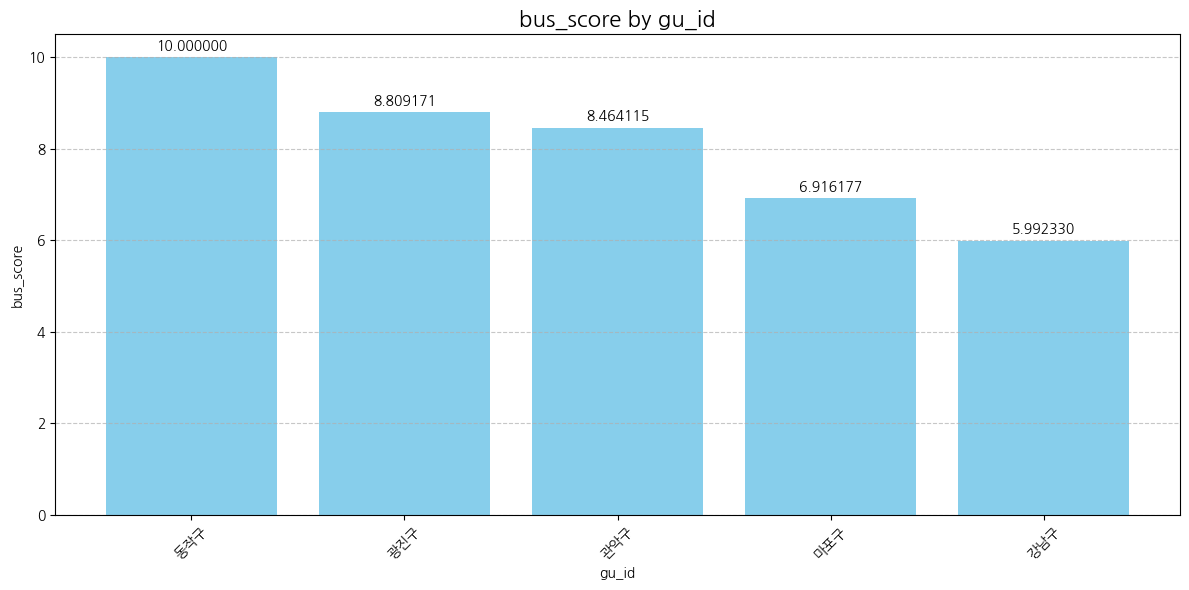

In [196]:
plt.figure(figsize=(12, 6))
bus_score = bus_score.sort_values(by='df_gu_bus_station', ascending=False)

bars=plt.bar(bus_score['gu_id'].astype(str), bus_score['df_gu_bus_station'], color='skyblue')
plt.title("bus_score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("bus_score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 지하철역 점수 막대그래프

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상위 3개 추출
top3 = df_daily_score.sort_values(by='df_sstation_count', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_daily_score[df_daily_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
subway_score = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

subway_score

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,df_gu_emergency,total_score
7,금천구,4.801066,6.358403,4.426617,6.874853,10.000000,9.309251,41.77
4,관악구,2.942535,4.501344,8.533362,8.464115,9.803446,7.870072,42.11
9,도봉구,9.253995,7.207955,1.000000,6.137797,9.719532,9.648634,42.97
0,강남구,1.345277,2.655138,1.944609,5.992330,7.360673,6.807481,26.11
12,마포구,1.000000,3.047769,5.957262,6.916177,7.648438,9.858067,34.43


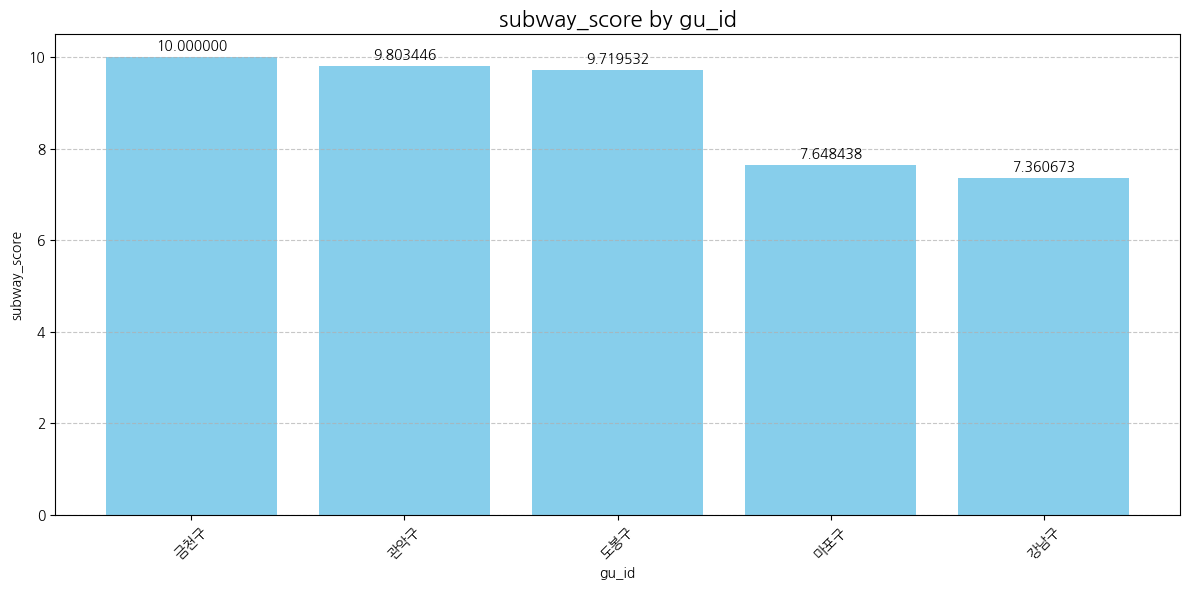

In [198]:
plt.figure(figsize=(12, 6))
subway_score = subway_score.sort_values(by='df_sstation_count', ascending=False)

bars=plt.bar(subway_score['gu_id'].astype(str), subway_score['df_sstation_count'], color='skyblue')
plt.title("subway_score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("subway_score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 응급실 점수 막대그래프

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상위 3개 추출
top3 = df_daily_score.sort_values(by='df_gu_emergency', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_daily_score[df_daily_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
emergency_score = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

emergency_score

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,df_gu_emergency,total_score
16,성북구,4.290046,3.823618,7.299360,7.121736,9.170962,10.000000,41.71
14,서초구,1.565690,1.000000,2.903973,6.160197,8.737003,9.946492,30.31
12,마포구,1.000000,3.047769,5.957262,6.916177,7.648438,9.858067,34.43
0,강남구,1.345277,2.655138,1.944609,5.992330,7.360673,6.807481,26.11


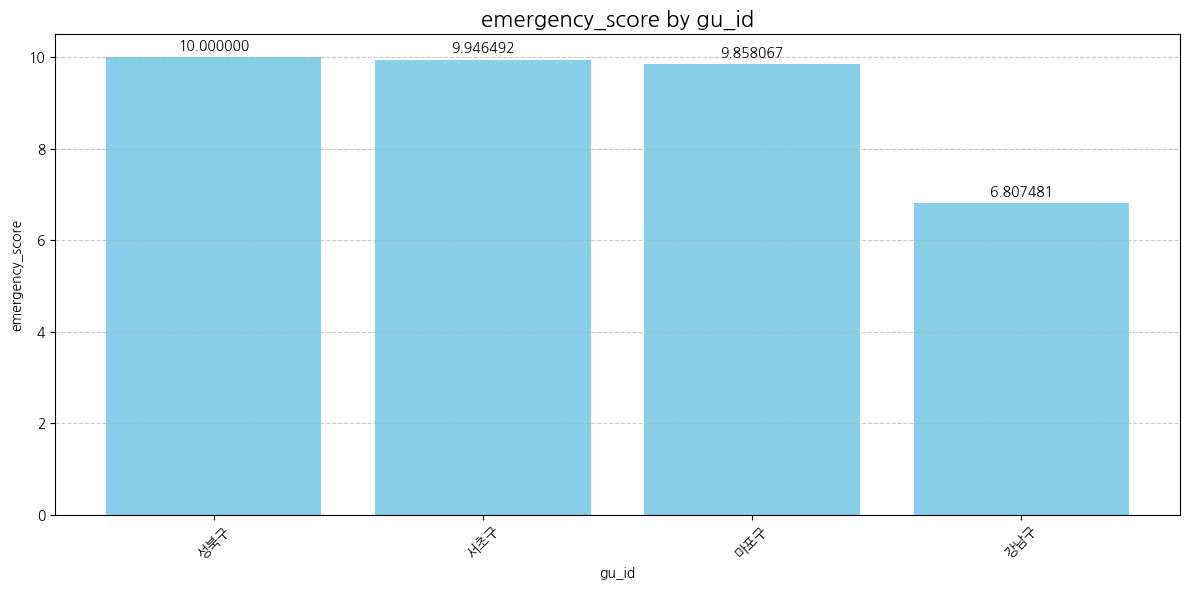

In [200]:
plt.figure(figsize=(12, 6))
emergency_score = emergency_score.sort_values(by='df_gu_emergency', ascending=False)

bars=plt.bar(emergency_score['gu_id'].astype(str), emergency_score['df_gu_emergency'], color='skyblue')
plt.title("emergency_score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("emergency_score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 종합 점수 막대그래프

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상위 3개 추출
top3 = df_daily_score.sort_values(by='total_score', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_daily_score[df_daily_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
sum_score = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

sum_score

,gu_id,df_aged_population,df_gu_disabled,df_gu_car,df_gu_bus_station,df_sstation_count,df_gu_emergency,total_score
2,강북구,10.000000,9.764883,8.037605,6.897096,9.691895,7.053287,51.44
8,노원구,5.213772,10.000000,10.000000,5.957505,8.801917,8.636205,48.61
21,은평구,6.060959,7.387069,7.068432,6.688881,8.598667,7.699392,43.50
0,강남구,1.345277,2.655138,1.944609,5.992330,7.360673,6.807481,26.11
12,마포구,1.000000,3.047769,5.957262,6.916177,7.648438,9.858067,34.43


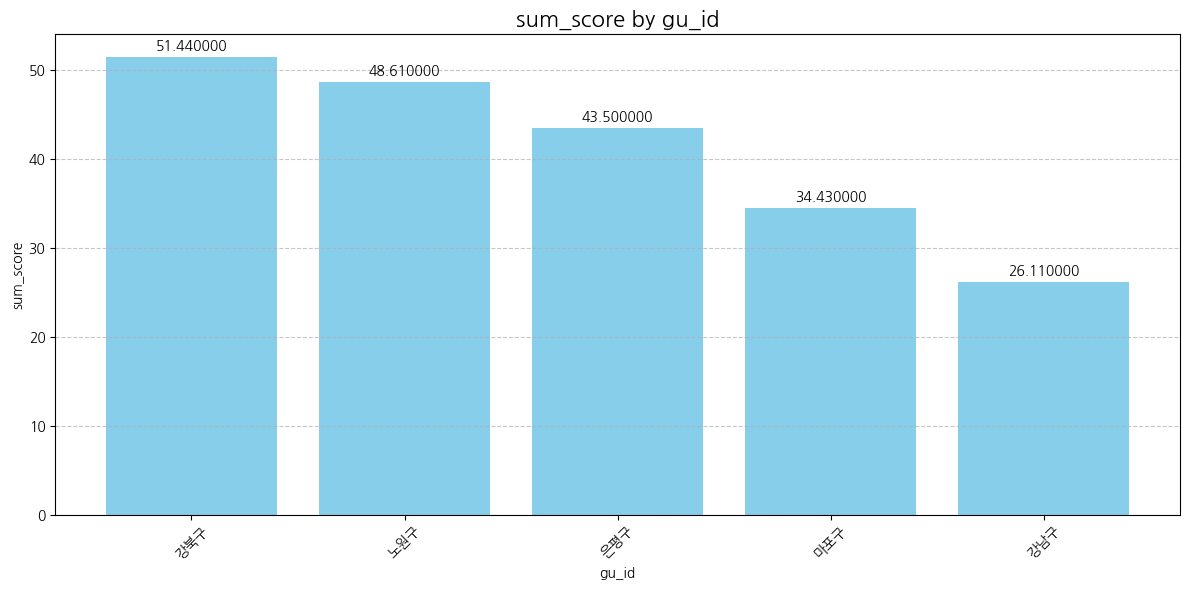

In [202]:
plt.figure(figsize=(12, 6))
sum_score = sum_score.sort_values(by='total_score', ascending=False)

bars=plt.bar(sum_score['gu_id'].astype(str), sum_score['total_score'], color='skyblue')
plt.title("sum_score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("sum_score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 종합 점수 전체 막대그래프

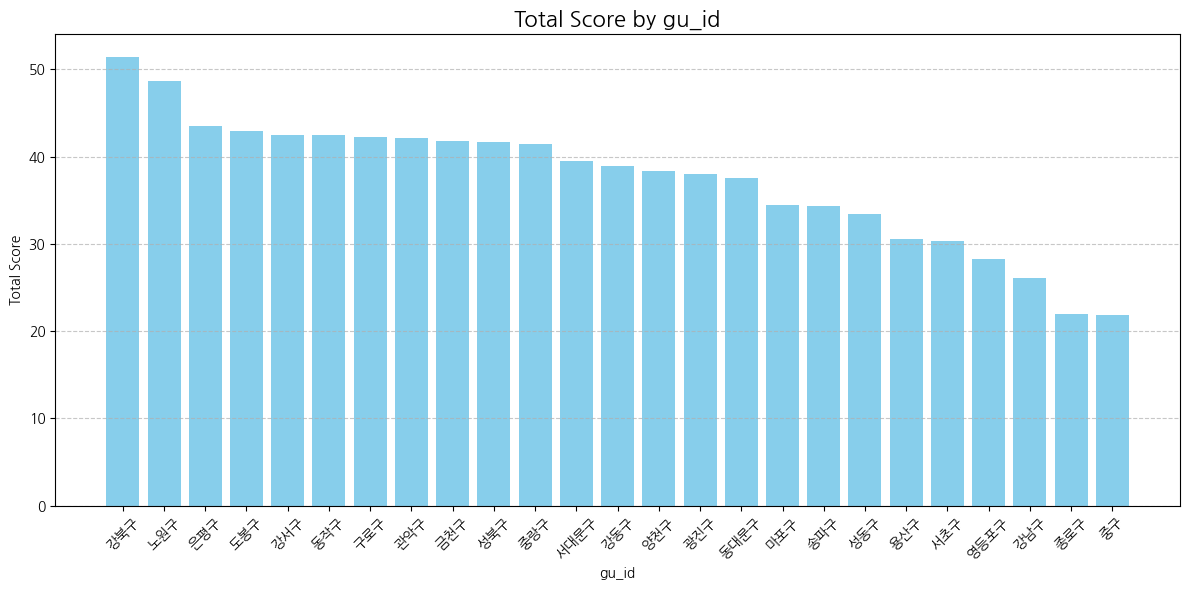

In [203]:

plt.figure(figsize=(12, 6))
sorted_df = df_daily_score.sort_values(by='total_score', ascending=False)

plt.bar(sorted_df['gu_id'].astype(str), sorted_df['total_score'], color='skyblue')
plt.title("Total Score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("Total Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 심야시간

## 점수 부여

-----------------------------------
### 심야 교통사고량 점수 부여

In [153]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

cursor = conn.cursor(buffered=True)

In [154]:

#심야 교통사고량 정보 갖고오기
cursor.execute('select * from car_accident')

#실행 결과 변수에 담기
accident = cursor.fetchall()

#출력 확인
for row in accident:
    print(row)

(0, 409.0)
(1, 91.0)
(2, 100.0)
(3, 141.0)
(4, 127.0)
(5, 74.0)
(6, 125.0)
(7, 88.0)
(8, 133.0)
(9, 54.0)
(10, 115.0)
(11, 128.0)
(12, 168.0)
(13, 75.0)
(14, 194.0)
(15, 85.0)
(16, 99.0)
(17, 234.0)
(18, 96.0)
(19, 208.0)
(20, 112.0)
(21, 108.0)
(22, 104.0)
(23, 83.0)
(24, 117.0)


In [155]:
#car_accident 테이블의 컬럼 값들 갖고오기
column_names = [desc[0] for desc in cursor.description]
#데이터프레임 제작
df_accident = pd.DataFrame(accident, columns=column_names)

df_accident.head()

,gu_id,night_car_accident
0,0,409.0
1,1,91.0
2,2,100.0
3,3,141.0
4,4,127.0


In [156]:
# 점수는 높은 night_car_accident 높게 (내림차순)
ranked = df_accident['night_car_accident'].rank(method='min', ascending=False)

# 최고 점수는 25점, 순위에 따라 점수 부여
df_accident['score'] = 26 - ranked.astype(int)

df_accident.head()

,gu_id,night_car_accident,score
0,0,409.0,25
1,1,91.0,7
2,2,100.0,10
3,3,141.0,20
4,4,127.0,17


In [157]:
df_accident.rename(columns={'night_car_accident': 'ratio(%)'}, inplace=True)
df_accident

,gu_id,ratio(%),score
0,0,409.0,25
1,1,91.0,7
2,2,100.0,10
3,3,141.0,20
4,4,127.0,17
5,5,74.0,2
6,6,125.0,16
7,7,88.0,6
8,8,133.0,19
9,9,54.0,1


In [158]:
conn.close()

-----------------------------------
### 심야 따릉이 이용자수 점수 부여

In [159]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

cursor = conn.cursor(buffered=True)

In [160]:

#심야시간 따릉이 이용자비율 정보 갖고오기
cursor.execute('SELECT gu_id, station_count, user_1, user_2, user_3, user_4 \
               FROM bicycle_population;')

#실행 결과 변수에 담기
bicycle = cursor.fetchall()

#출력 확인
for row in bicycle:
    print(row)

(0, 166, 54, 37, 29, 17)
(1, 112, 58, 40, 28, 22)
(2, 59, 30, 21, 18, 13)
(3, 187, 109, 74, 54, 54)
(4, 70, 53, 38, 26, 21)
(5, 81, 76, 42, 31, 24)
(6, 111, 44, 32, 21, 20)
(7, 74, 19, 11, 8, 6)
(8, 141, 84, 59, 45, 31)
(9, 75, 34, 24, 18, 15)
(10, 80, 47, 34, 25, 20)
(11, 71, 32, 21, 14, 16)
(12, 117, 62, 43, 28, 21)
(13, 78, 32, 19, 14, 11)
(14, 140, 32, 22, 16, 10)
(15, 90, 51, 28, 20, 16)
(16, 80, 40, 28, 19, 15)
(17, 215, 119, 68, 46, 43)
(18, 108, 67, 41, 26, 24)
(19, 153, 79, 52, 32, 36)
(20, 87, 27, 21, 13, 13)
(21, 97, 38, 29, 19, 12)
(22, 100, 45, 31, 21, 23)
(23, 86, 31, 21, 17, 16)
(24, 94, 48, 33, 25, 17)


In [161]:
#bicycle_population 테이블의 컬럼 값들 갖고오기
column_names = [desc[0] for desc in cursor.description]
#데이터프레임 제작
df_bicycle = pd.DataFrame(bicycle, columns=column_names)

df_bicycle.head()

,gu_id,station_count,user_1,user_2,user_3,user_4
0,0,166,54,37,29,17
1,1,112,58,40,28,22
2,2,59,30,21,18,13
3,3,187,109,74,54,54
4,4,70,53,38,26,21


In [162]:
df_bicycle['users'] = df_bicycle[['user_1','user_2','user_3','user_4']].sum(axis=1)

df_bicycle.head()

,gu_id,station_count,user_1,user_2,user_3,user_4,users
0,0,166,54,37,29,17,137
1,1,112,58,40,28,22,148
2,2,59,30,21,18,13,82
3,3,187,109,74,54,54,291
4,4,70,53,38,26,21,138


In [163]:
df_bicycle.drop(['user_1','user_2','user_3','user_4'], axis=1, inplace=True )
df_bicycle.head()

,gu_id,station_count,users
0,0,166,137
1,1,112,148
2,2,59,82
3,3,187,291
4,4,70,138


In [164]:
df_bicycle['ratio(%)']=(df_bicycle['users']/df_bicycle['station_count'])*100
df_bicycle.head()

,gu_id,station_count,users,ratio(%)
0,0,166,137,82.530120
1,1,112,148,132.142857
2,2,59,82,138.983051
3,3,187,291,155.614973
4,4,70,138,197.142857


In [165]:
# 점수는 높은 ratio(%) 높게 (내림차순)
ranked = df_bicycle['ratio(%)'].rank(method='min', ascending=False)

# 최고 점수는 25점, 순위에 따라 점수 부여
df_bicycle['score'] = 26 - ranked.astype(int)

df_bicycle.head()

,gu_id,station_count,users,ratio(%),score
0,0,166,137,82.530120,3
1,1,112,148,132.142857,18
2,2,59,82,138.983051,19
3,3,187,291,155.614973,22
4,4,70,138,197.142857,24


In [166]:
conn.close()

-----------------------------------
### 심야 버스 이용자수 점수 부여

In [167]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

cursor = conn.cursor(buffered=True)


In [168]:
#구 별 노인인구 정보 갖고오기
cursor.execute('SELECT gu_id, night_bus, user_1, user_2, user_3, user_4 from bus_population')

#실행 결과 변수에 담기
night_bus = cursor.fetchall()

#출력 확인
for row in night_bus:
    print(row)

(0, 10, 1032, 647, 573, 1608)
(1, 3, 432, 213, 167, 852)
(2, 6, 724, 285, 281, 2695)
(3, 6, 549, 393, 301, 1960)
(4, 8, 745, 568, 508, 2335)
(5, 7, 611, 464, 365, 1034)
(6, 6, 289, 246, 255, 2379)
(7, 4, 184, 101, 110, 1833)
(8, 6, 518, 238, 216, 1352)
(9, 4, 517, 196, 225, 1245)
(10, 11, 749, 402, 347, 1901)
(11, 10, 469, 277, 234, 891)
(12, 14, 1132, 730, 619, 1263)
(13, 14, 711, 388, 295, 2045)
(14, 14, 1208, 697, 585, 1371)
(15, 7, 254, 196, 148, 856)
(16, 10, 785, 388, 293, 2837)
(17, 8, 939, 496, 354, 1858)
(18, 6, 285, 200, 146, 1392)
(19, 10, 453, 374, 316, 1865)
(20, 14, 573, 362, 341, 832)
(21, 8, 807, 301, 233, 2057)
(22, 21, 1389, 873, 744, 2132)
(23, 21, 1196, 722, 628, 1405)
(24, 8, 606, 327, 281, 2053)


In [169]:
import sqlite3

#bus_population 테이블의 컬럼 값들 갖고오기
column_names = [desc[0] for desc in cursor.description]
#데이터프레임 제작
df_night_bus = pd.DataFrame(night_bus, columns=column_names)

df_night_bus.head()

,gu_id,night_bus,user_1,user_2,user_3,user_4
0,0,10,1032,647,573,1608
1,1,3,432,213,167,852
2,2,6,724,285,281,2695
3,3,6,549,393,301,1960
4,4,8,745,568,508,2335


In [170]:
# night_bus 값을 10배로 변경
df_night_bus['night_bus'] = df_night_bus['night_bus'] * 10

# user_ 컬럼들 합산해서 users 컬럼 만들기
df_night_bus['users'] = df_night_bus[['user_1', 'user_2', 'user_3', 'user_4']].sum(axis=1)

# 기존 user_ 컬럼들 제거
df_night_bus.drop(columns=['user_1', 'user_2', 'user_3', 'user_4'], inplace=True)

df_night_bus

,gu_id,night_bus,users
0,0,100,3860
1,1,30,1664
2,2,60,3985
3,3,60,3203
4,4,80,4156
5,5,70,2474
6,6,60,3169
7,7,40,2228
8,8,60,2324
9,9,40,2183


In [171]:
df_night_bus['ratio(%)'] = (df_night_bus['users'] / df_night_bus['night_bus']) * 100
df_night_bus.head()

,gu_id,night_bus,users,ratio(%)
0,0,100,3860,3860.000000
1,1,30,1664,5546.666667
2,2,60,3985,6641.666667
3,3,60,3203,5338.333333
4,4,80,4156,5195.000000


In [172]:
# 점수는 높은 ratio일수록 높게 (내림차순)
ranked = df_night_bus['ratio(%)'].rank(method='min', ascending=False)

# 최고 점수는 25점, 순위에 따라 점수 부여
df_night_bus['score'] = 26 - ranked.astype(int)

df_night_bus.head()

,gu_id,night_bus,users,ratio(%),score
0,0,100,3860,3860.000000,13
1,1,30,1664,5546.666667,23
2,2,60,3985,6641.666667,25
3,3,60,3203,5338.333333,21
4,4,80,4156,5195.000000,19


In [173]:
conn.close()

---
### 구 별 자차 등록률 점수 부여

In [174]:
df_gu_car

,gu_id,population,car_count,ratio(%),score
0,0,550282,254051,46.167420,2
1,1,463318,166203,35.872338,9
2,2,292977,73634,25.133031,23
3,3,568826,202214,35.549360,10
4,4,497883,116612,23.421567,24
5,5,351180,95829,27.287716,21
6,6,415651,145248,34.944701,11
7,7,241105,90653,37.598971,5
8,8,502925,92329,18.358403,25
9,9,309494,152978,49.428422,1


---
### 심야 이동인구 점수 부여

In [175]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

cursor = conn.cursor(buffered=True)

In [176]:
#구 별 등록인구 정보 갖고오기
cursor.execute('SELECT gu_id, user_1, user_2, user_3, user_4 from moving_population')

#실행 결과 변수에 담기
moving_population = cursor.fetchall()

#출력 확인
for row in moving_population:
    print(row)


(0, 10753, 8406, 7223, 8740)
(1, 6961, 5155, 4818, 6797)
(2, 3919, 2812, 2258, 2870)
(3, 6973, 5046, 4868, 6597)
(4, 5809, 4608, 3832, 4984)
(5, 5798, 4087, 3500, 4326)
(6, 4678, 3057, 2972, 4529)
(7, 2791, 2282, 2166, 3012)
(8, 8234, 5588, 4086, 5188)
(9, 3201, 2430, 2008, 2806)
(10, 6092, 4271, 3472, 4184)
(11, 4148, 3065, 2915, 3690)
(12, 5867, 4356, 3153, 3693)
(13, 4642, 3275, 2398, 3220)
(14, 5619, 4335, 4012, 5453)
(15, 4996, 3666, 3089, 4190)
(16, 6947, 4942, 3697, 4693)
(17, 9735, 7080, 6526, 8440)
(18, 4049, 2969, 2796, 4100)
(19, 4742, 3653, 3155, 4523)
(20, 3617, 2871, 2352, 2989)
(21, 5814, 4328, 3430, 4529)
(22, 2583, 1936, 1330, 1731)
(23, 4684, 3495, 2762, 2981)
(24, 4966, 3500, 2663, 3328)


In [177]:
import sqlite3

#gu_car_count 테이블의 컬럼 값들 갖고오기
column_names = [desc[0] for desc in cursor.description]
#데이터프레임 제작
df_moving_population = pd.DataFrame(moving_population, columns=column_names)

df_moving_population.head()

,gu_id,user_1,user_2,user_3,user_4
0,0,10753,8406,7223,8740
1,1,6961,5155,4818,6797
2,2,3919,2812,2258,2870
3,3,6973,5046,4868,6597
4,4,5809,4608,3832,4984


In [178]:
# user_ 컬럼들 합산해서 users 컬럼 만들기
df_moving_population['users'] = df_moving_population[['user_1', 'user_2', 'user_3', 'user_4']].sum(axis=1)

# 기존 user_ 컬럼들 제거
df_moving_population.drop(columns=['user_1', 'user_2', 'user_3', 'user_4'], inplace=True)

df_moving_population.head()

,gu_id,users
0,0,35122
1,1,23731
2,2,11859
3,3,23484
4,4,19233


In [179]:
df_moving_population['ratio(%)']=df_moving_population['users']/1
df_moving_population.drop('users', axis=1, inplace=True)
df_moving_population.head()

,gu_id,ratio(%)
0,0,35122.0
1,1,23731.0
2,2,11859.0
3,3,23484.0
4,4,19233.0


In [180]:
df_moving_population.head()

,gu_id,ratio(%)
0,0,35122.0
1,1,23731.0
2,2,11859.0
3,3,23484.0
4,4,19233.0


In [181]:
# 점수는 높은 ratio(%) 높게 (내림차순)
ranked = df_moving_population['ratio(%)'].rank(method='min', ascending=False)

# 최고 점수는 25점, 순위에 따라 점수 부여
df_moving_population['score'] = 26 - ranked.astype(int)

df_moving_population.head()

,gu_id,ratio(%),score
0,0,35122.0,25
1,1,23731.0,23
2,2,11859.0,5
3,3,23484.0,22
4,4,19233.0,18


In [214]:
conn.close()

## 점수 재산정

In [215]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

cursor = conn.cursor(buffered=True)

### 테이블 병합 데이터프레임 형성

In [216]:
dfs_dict = {
'df_accident': df_accident,
'df_bicycle': df_bicycle,
'df_night_bus': df_night_bus,
'df_moving_population': df_moving_population,
'df_gu_car' : df_gu_car
}

# gu_id와 ratio(%) 추출 후 컬럼 이름을 해당 df 이름으로 변경
renamed_dfs = [
df[['gu_id', 'ratio(%)']].rename(columns={'ratio(%)': name})
for name, df in dfs_dict.items()
]

# gu_id 기준으로 병합
from functools import reduce
ratio_df = reduce(lambda left, right: pd.merge(left, right, on='gu_id', how='outer'), renamed_dfs)

ratio_df


,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car
0,0,409.0,82.530120,3860.000000,35122.0,46.167420
1,1,91.0,132.142857,5546.666667,23731.0,35.872338
2,2,100.0,138.983051,6641.666667,11859.0,25.133031
3,3,141.0,155.614973,5338.333333,23484.0,35.549360
4,4,127.0,197.142857,5195.000000,19233.0,23.421567
5,5,74.0,213.580247,3534.285714,17711.0,27.287716
6,6,125.0,105.405405,5281.666667,15236.0,34.944701
7,7,88.0,59.459459,5570.000000,10251.0,37.598971
8,8,133.0,155.319149,3873.333333,23096.0,18.358403
9,9,54.0,121.333333,5457.500000,10445.0,49.428422


### 점수 재산정

In [217]:
def normalize_score(series, reverse=False):
    max_val = series.max()
    min_val = series.min()
    if reverse:
        return 1 + 9 * (max_val - series) / (max_val - min_val)
    else:
        return 1 + 9 * (series - min_val) / (max_val - min_val)

# 점수 계산
df_scores = pd.DataFrame()
df_scores['gu_id'] = ratio_df['gu_id']
df_scores['df_accident'] = normalize_score(ratio_df['df_accident'])        # 높을수록 좋음
df_scores['df_bicycle'] = normalize_score(ratio_df['df_bicycle'])                # 높을수록 좋음
df_scores['df_night_bus'] = normalize_score(ratio_df['df_night_bus'])                # 높을수록 좋음
df_scores['df_moving_population'] = normalize_score(ratio_df['df_moving_population'])                # 높을수록 좋음
df_scores['df_gu_car'] = normalize_score(ratio_df['df_gu_car'], reverse=True)            # 낮을수록 좋음

df_scores

,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car
0,0,10.000000,2.460555,5.125539,10.000000,1.944609
1,1,1.938028,5.314825,8.081174,6.277721,4.926768
2,2,2.166197,5.708348,10.000000,2.398264,8.037605
3,3,3.205634,6.665200,7.716100,6.197008,5.020325
4,4,2.850704,9.054340,7.464930,4.807893,8.533362
5,5,1.507042,10.000000,4.554773,4.310544,7.413461
6,6,2.800000,3.776593,7.616800,3.501779,5.195475
7,7,1.861972,1.133276,8.122062,1.872812,4.426617
8,8,3.002817,6.648181,5.148904,6.070220,10.000000
9,9,1.000000,4.692943,7.924922,1.936207,1.000000


In [218]:
gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', 
           '광진구', '구로구', '금천구', '노원구', '도봉구', 
           '동대문구', '동작구', '마포구', '서대문구', '서초구', 
           '성동구', '성북구', '송파구', '양천구', '영등포구', 
           '용산구', '은평구', '종로구', '중구', '중랑구']


gu_dict = dict(enumerate(gu_list))
df_scores['gu_id'] = df_scores['gu_id'].map(gu_dict)
df_scores

,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609
1,강동구,1.938028,5.314825,8.081174,6.277721,4.926768
2,강북구,2.166197,5.708348,10.000000,2.398264,8.037605
3,강서구,3.205634,6.665200,7.716100,6.197008,5.020325
4,관악구,2.850704,9.054340,7.464930,4.807893,8.533362
5,광진구,1.507042,10.000000,4.554773,4.310544,7.413461
6,구로구,2.800000,3.776593,7.616800,3.501779,5.195475
7,금천구,1.861972,1.133276,8.122062,1.872812,4.426617
8,노원구,3.002817,6.648181,5.148904,6.070220,10.000000
9,도봉구,1.000000,4.692943,7.924922,1.936207,1.000000


In [219]:
df_night_score = df_scores.copy()

# 총합 점수 계산
df_night_score['total_score'] = df_night_score.drop(columns='gu_id').sum(axis=1).round(3)
df_night_score

,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
1,강동구,1.938028,5.314825,8.081174,6.277721,4.926768,26.539
2,강북구,2.166197,5.708348,10.000000,2.398264,8.037605,28.310
3,강서구,3.205634,6.665200,7.716100,6.197008,5.020325,28.804
4,관악구,2.850704,9.054340,7.464930,4.807893,8.533362,32.711
5,광진구,1.507042,10.000000,4.554773,4.310544,7.413461,27.786
6,구로구,2.800000,3.776593,7.616800,3.501779,5.195475,22.891
7,금천구,1.861972,1.133276,8.122062,1.872812,4.426617,17.417
8,노원구,3.002817,6.648181,5.148904,6.070220,10.000000,30.870
9,도봉구,1.000000,4.692943,7.924922,1.936207,1.000000,16.554


In [220]:
conn.close()

---
db insert

In [221]:
import mysql.connector

gu_list = ['강남구', '강동구', '강북구', '강서구', '관악구', 
           '광진구', '구로구', '금천구', '노원구', '도봉구', 
           '동대문구', '동작구', '마포구', '서대문구', '서초구', 
           '성동구', '성북구', '송파구', '양천구', '영등포구', 
           '용산구', '은평구', '종로구', '중구', '중랑구']

conn = mysql.connector.connect(
host = "database-1.cb4o0sikaygu.ap-northeast-2.rds.amazonaws.com",
port = 3306,
user = "root",
password = "root762462",
database = "edadb"
)

In [222]:
df_db =df_night_score.copy()
for i in range(len(gu_list)):
    df_db.iloc[i,0] = i

df_db['gu_id']=df_db['gu_id'].astype(int)

In [223]:
##### 바꿀 테이블로 이름 바꾸기.
sql = "insert into night_score values (%s,%s,%s,%s,%s,%s,%s)"
cursor = conn.cursor(buffered=True)

In [224]:
import numpy as np

def convert_types(row):
    new_row = []
    for item in row:
        if isinstance(item, (np.int64, np.integer)):
            new_row.append(int(item))
        elif isinstance(item, (np.float64, np.floating)):
            new_row.append(float(item))
        else:
            new_row.append(item)
    return tuple(new_row)

data = [convert_types(row) for row in df_db.values]

cursor.executemany(sql, data)
conn.commit()

In [225]:
conn.close()

## 막대그래프

### accident 점수 막대그래프

In [226]:
df_night_score.head()

,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
1,강동구,1.938028,5.314825,8.081174,6.277721,4.926768,26.539
2,강북구,2.166197,5.708348,10.000000,2.398264,8.037605,28.310
3,강서구,3.205634,6.665200,7.716100,6.197008,5.020325,28.804
4,관악구,2.850704,9.054340,7.464930,4.807893,8.533362,32.711


In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상위 3개 추출
top3 = df_night_score.sort_values(by='df_accident', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_night_score[df_night_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
df_accident_sort = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

df_accident_sort


,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
17,송파구,5.563380,5.097889,6.349995,8.908249,4.683737,30.603
19,영등포구,4.904225,5.195305,3.632534,3.775289,4.862773,22.370
12,마포구,3.890141,5.284971,3.047749,4.100755,5.957262,22.281


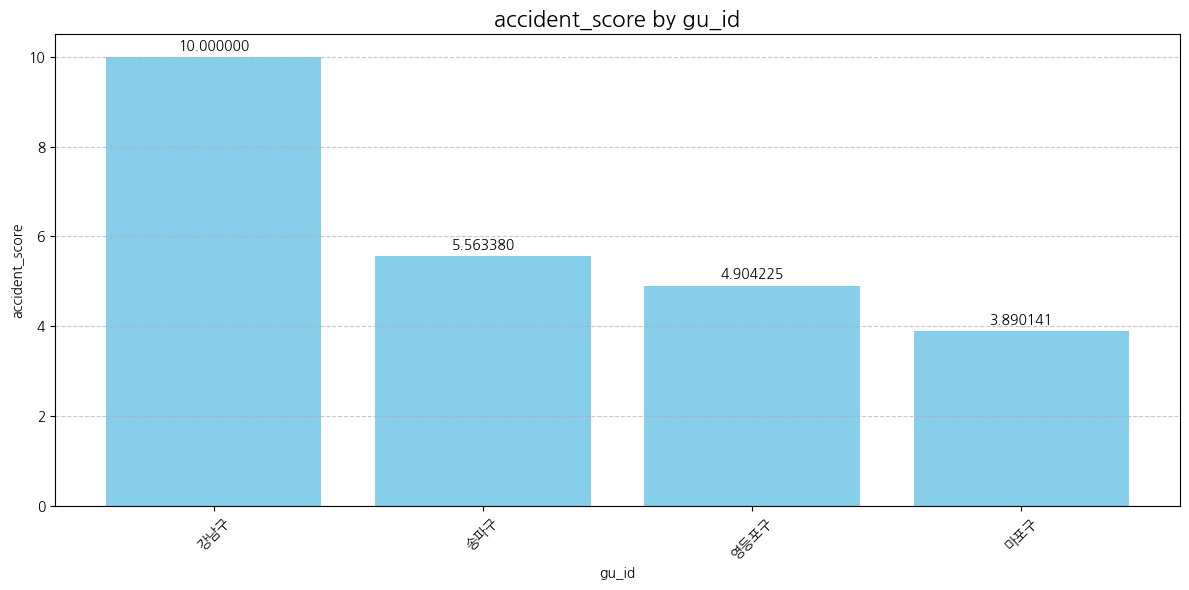

In [231]:
plt.figure(figsize=(12, 6))
df_accident_score = df_accident_sort.sort_values(by='df_accident', ascending=False)

bars=plt.bar(df_accident_sort['gu_id'].astype(str), df_accident_sort['df_accident'], color='skyblue')
plt.title("accident_score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("accident_score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 따릉이 이용자 수 점수 막대그래프

In [232]:
df_night_score.head()

,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
1,강동구,1.938028,5.314825,8.081174,6.277721,4.926768,26.539
2,강북구,2.166197,5.708348,10.000000,2.398264,8.037605,28.310
3,강서구,3.205634,6.665200,7.716100,6.197008,5.020325,28.804
4,관악구,2.850704,9.054340,7.464930,4.807893,8.533362,32.711


In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상위 3개 추출
top3 = df_night_score.sort_values(by='df_bicycle', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_night_score[df_night_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
bicycle_population = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

bicycle_population


,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
5,광진구,1.507042,10.000000,4.554773,4.310544,7.413461,27.786
4,관악구,2.850704,9.054340,7.464930,4.807893,8.533362,32.711
10,동대문구,2.546479,6.773647,3.776227,4.411190,7.025178,24.533
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
12,마포구,3.890141,5.284971,3.047749,4.100755,5.957262,22.281


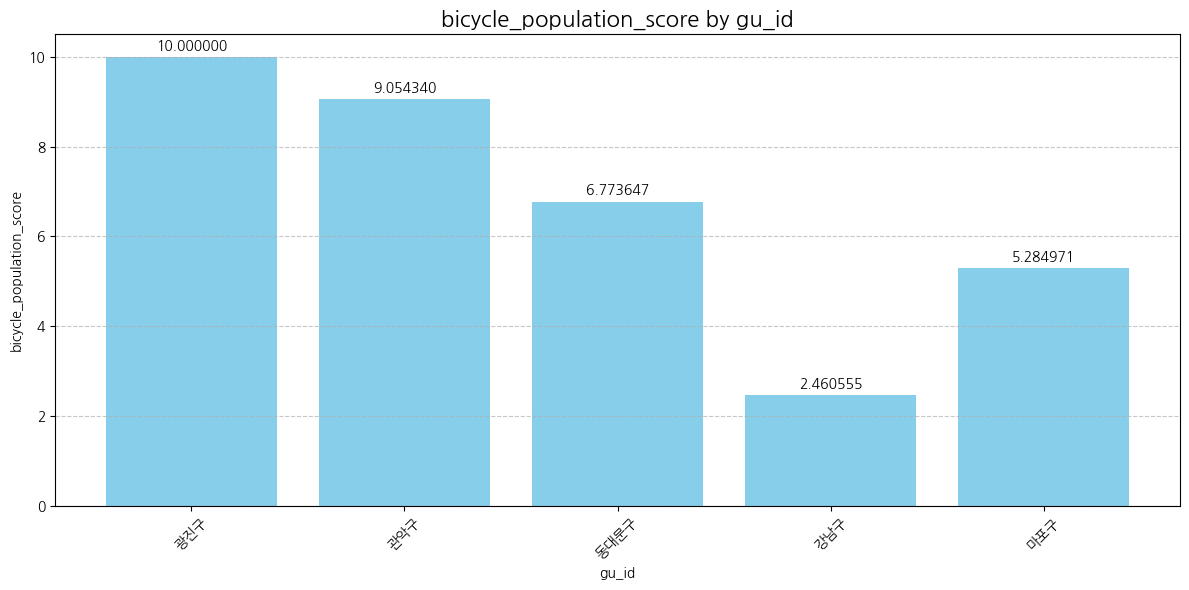

In [234]:
plt.figure(figsize=(12, 6))
bicycle_population_score = bicycle_population.sort_values(by='df_bicycle', ascending=False)

bars=plt.bar(bicycle_population['gu_id'].astype(str), bicycle_population['df_bicycle'], color='skyblue')
plt.title("bicycle_population_score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("bicycle_population_score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 심야 버스 이용자수 점수 막대그래프

In [235]:
df_night_score.head()


,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
1,강동구,1.938028,5.314825,8.081174,6.277721,4.926768,26.539
2,강북구,2.166197,5.708348,10.000000,2.398264,8.037605,28.310
3,강서구,3.205634,6.665200,7.716100,6.197008,5.020325,28.804
4,관악구,2.850704,9.054340,7.464930,4.807893,8.533362,32.711


In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상위 3개 추출
top3 = df_night_score.sort_values(by='df_night_bus', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_night_score[df_night_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
night_bus_population = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

night_bus_population

,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
2,강북구,2.166197,5.708348,10.000000,2.398264,8.037605,28.310
7,금천구,1.861972,1.133276,8.122062,1.872812,4.426617,17.417
1,강동구,1.938028,5.314825,8.081174,6.277721,4.926768,26.539
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
12,마포구,3.890141,5.284971,3.047749,4.100755,5.957262,22.281


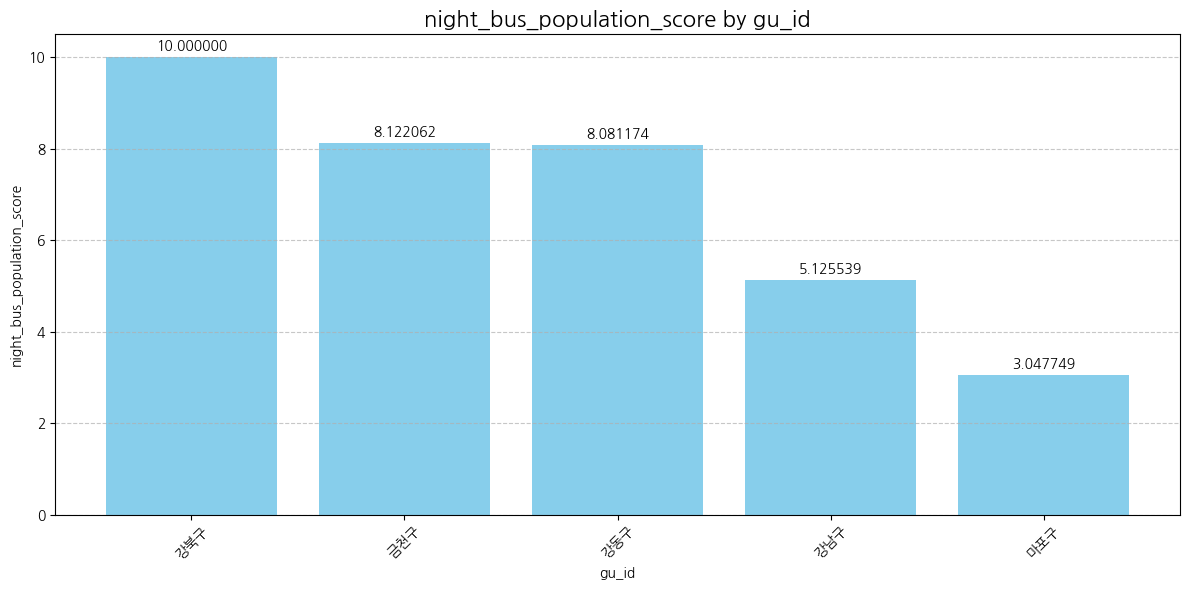

In [237]:
plt.figure(figsize=(12, 6))
night_bus_population_score = night_bus_population.sort_values(by='df_night_bus', ascending=False)

bars=plt.bar(night_bus_population['gu_id'].astype(str), night_bus_population['df_night_bus'], color='skyblue')
plt.title("night_bus_population_score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("night_bus_population_score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 심야시간 이동인구 점수 막대그래프

In [238]:
df_night_score.head()


,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
1,강동구,1.938028,5.314825,8.081174,6.277721,4.926768,26.539
2,강북구,2.166197,5.708348,10.000000,2.398264,8.037605,28.310
3,강서구,3.205634,6.665200,7.716100,6.197008,5.020325,28.804
4,관악구,2.850704,9.054340,7.464930,4.807893,8.533362,32.711


In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상위 3개 추출
top3 = df_night_score.sort_values(by='df_moving_population', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_night_score[df_night_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
moving_population = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

moving_population


,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
17,송파구,5.563380,5.097889,6.349995,8.908249,4.683737,30.603
1,강동구,1.938028,5.314825,8.081174,6.277721,4.926768,26.539
12,마포구,3.890141,5.284971,3.047749,4.100755,5.957262,22.281


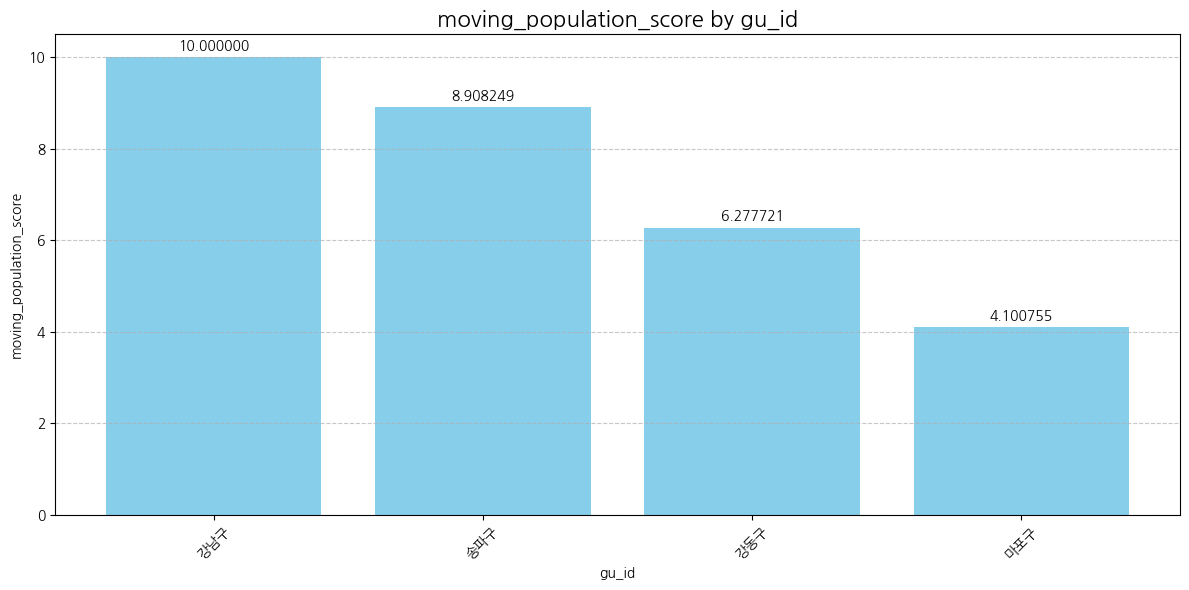

In [240]:
plt.figure(figsize=(12, 6))
moving_population_score = moving_population.sort_values(by='df_moving_population', ascending=False)

bars=plt.bar(moving_population['gu_id'].astype(str), moving_population['df_moving_population'], color='skyblue')
plt.title("moving_population_score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("moving_population_score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 자차 등록 점수 막대그래프

In [241]:
df_night_score.head()

,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
1,강동구,1.938028,5.314825,8.081174,6.277721,4.926768,26.539
2,강북구,2.166197,5.708348,10.000000,2.398264,8.037605,28.310
3,강서구,3.205634,6.665200,7.716100,6.197008,5.020325,28.804
4,관악구,2.850704,9.054340,7.464930,4.807893,8.533362,32.711


In [242]:
# 상위 3개 추출
top3 = df_night_score.sort_values(by='df_gu_car', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_night_score[df_night_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
enroll_car = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

enroll_car

,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
8,노원구,3.002817,6.648181,5.148904,6.070220,10.000000,30.870
4,관악구,2.850704,9.054340,7.464930,4.807893,8.533362,32.711
2,강북구,2.166197,5.708348,10.000000,2.398264,8.037605,28.310
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
12,마포구,3.890141,5.284971,3.047749,4.100755,5.957262,22.281


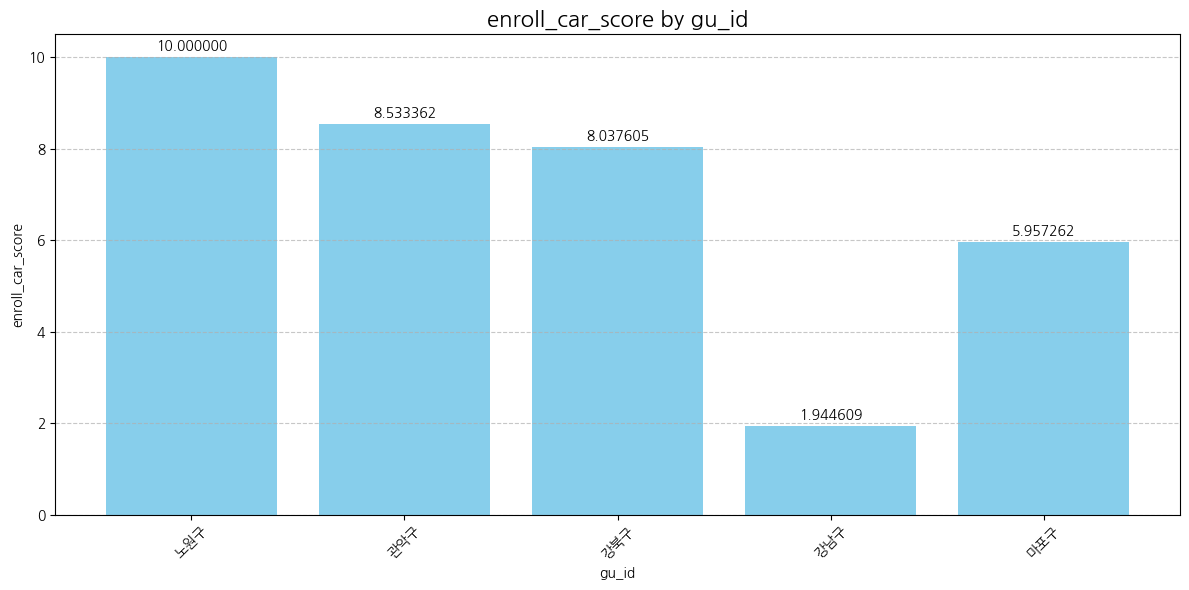

In [243]:
plt.figure(figsize=(12, 6))
enroll_car_score = enroll_car.sort_values(by='df_gu_car', ascending=False)

bars=plt.bar(enroll_car['gu_id'].astype(str), enroll_car['df_gu_car'], color='skyblue')
plt.title("enroll_car_score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("enroll_car_score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 종합 점수 막대그래프

In [244]:
df_night_score.head()

,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
1,강동구,1.938028,5.314825,8.081174,6.277721,4.926768,26.539
2,강북구,2.166197,5.708348,10.000000,2.398264,8.037605,28.310
3,강서구,3.205634,6.665200,7.716100,6.197008,5.020325,28.804
4,관악구,2.850704,9.054340,7.464930,4.807893,8.533362,32.711


In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 상위 3개 추출
top3 = df_night_score.sort_values(by='total_score', ascending=False).head(3)

# 강남구, 마포구 선택
extra = df_night_score[df_night_score['gu_id'].isin(['강남구', '마포구'])]

# 두 데이터 합치기 (중복 제거)
night = pd.concat([top3, extra]).drop_duplicates(subset='gu_id')

night

,gu_id,df_accident,df_bicycle,df_night_bus,df_moving_population,df_gu_car,total_score
4,관악구,2.850704,9.054340,7.464930,4.807893,8.533362,32.711
8,노원구,3.002817,6.648181,5.148904,6.070220,10.000000,30.870
17,송파구,5.563380,5.097889,6.349995,8.908249,4.683737,30.603
0,강남구,10.000000,2.460555,5.125539,10.000000,1.944609,29.531
12,마포구,3.890141,5.284971,3.047749,4.100755,5.957262,22.281


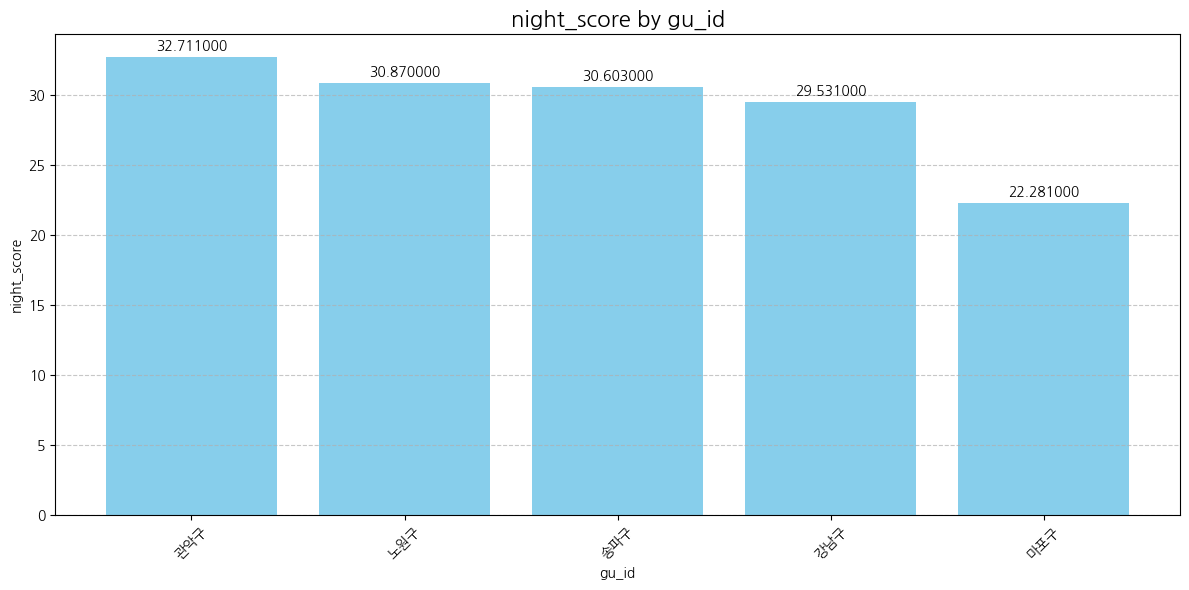

In [246]:
plt.figure(figsize=(12, 6))
night_score = night.sort_values(by='total_score', ascending=False)

bars=plt.bar(night['gu_id'].astype(str), night['total_score'], color='skyblue')
plt.title("night_score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("night_score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar_label(bars, fmt='%.6f', padding=3)
plt.tight_layout()
plt.show()

### 종합 점수 전체 막대그래프

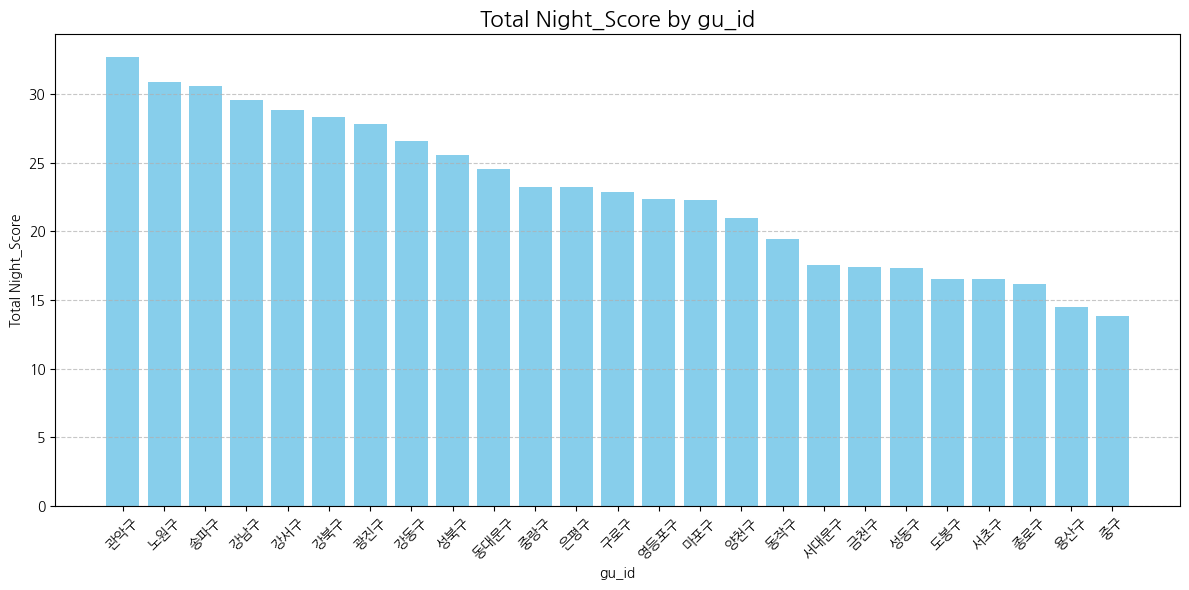

In [248]:
plt.figure(figsize=(12, 6))
sorted_df = df_night_score.sort_values(by='total_score', ascending=False)

plt.bar(sorted_df['gu_id'].astype(str), sorted_df['total_score'], color='skyblue')
plt.title("Total Night_Score by gu_id", fontsize=16)
plt.xlabel("gu_id")
plt.ylabel("Total Night_Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()